<p style="text-align:center; color:#0000ff; font-weight:bold; font-size:30px;">Black Friday Sales Analysis</p>

### **Importing Essential Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Reading CSV Files**

In [3]:
sales = pd.read_csv('BlackFriday.csv')
del sales['Product_Category_2'], sales['Product_Category_3']
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### **Summary of the Black Friday Sales Data**

In [3]:
#shape of the sales data
sales.shape

(537577, 10)

In [4]:
#concise summary of the sales DataFrame
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Gender                      537577 non-null  object
 3   Age                         537577 non-null  object
 4   Occupation                  537577 non-null  int64 
 5   City_Category               537577 non-null  object
 6   Stay_In_Current_City_Years  537577 non-null  object
 7   Marital_Status              537577 non-null  int64 
 8   Product_Category_1          537577 non-null  int64 
 9   Purchase                    537577 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 41.0+ MB


In [5]:
#checking the null values if any in the data
sales.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [6]:
# Displaying descriptive statistics for the 'sales' DataFrame
sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,23961.000000


In [7]:
# Displaying descriptive statistics for the 'sales' DataFrame for 'categorical' column
sales.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


----

# Basic Analysis of the Features

### Total Customers Participated in the sales 

In [8]:
sales['User_ID'].nunique()

5891

### Total Products in our Inventory up for sale

In [9]:
sales['Product_ID'].nunique()

3623

### Gender of our Customers

In [10]:
#Group the sales data by 'User_ID' and 'Gender', and calculate the sum of each group
Total_customers = sales.groupby(['User_ID', 'Gender']).sum().reset_index()

# Count the occurrences of each gender in the grouped data
Total_customers['Gender'].value_counts().reset_index()

,Gender,count
0,M,4225
1,F,1666


Interesting Fact - Most of our Customers are **'Males'  !!**

### Different Age groups of customers

In [11]:
# Get the unique values in the 'Age' column
sales['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
#Group the sales data by 'User_ID' and 'Age', and calculate the sum of each group
Total_customers = sales.groupby(['User_ID', 'Age']).sum().reset_index()

# Count the occurrences of each age category in the grouped data
Total_customers['Age'].value_counts().reset_index()

,Age,count
0,26-35,2053
1,36-45,1167
2,18-25,1069
3,46-50,531
4,51-55,481
5,55+,372
6,0-17,218


**Highest** number of customers are in Age group of **26-35**

### Different Occupations our customers belongs to 

In [13]:
# Get the unique values in the 'Occupation' column
sales['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [14]:
#Group the sales data by 'User_ID' and 'Occupation', and calculate the sum of each group
Total_customers = sales.groupby(['User_ID', 'Occupation']).sum().reset_index()

# Count the occurrences of each Occupation in the grouped data
Total_customers['Occupation'].value_counts().reset_index()

,Occupation,count
0,4,740
1,0,688
2,7,669
3,1,517
4,17,491
5,12,376
6,14,294
7,20,273
8,2,256
9,16,235


**Highest** number of Customers belongs to **Occuption '4'**

### Different City categories

In [15]:
# Get the unique values in the 'City_Category' column
sales['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
#Group the sales data by 'User_ID' and 'City_Category', and calculate the sum of each group
Total_customers = sales.groupby(['User_ID', 'City_Category']).sum().reset_index()

# Count the occurrences of each City_Category in the grouped data
Total_customers['City_Category'].value_counts().reset_index()

,City_Category,count
0,C,3139
1,B,1707
2,A,1045


Most of our customers belongs to City_Category 'C'

### Number of years Stay In Current City  

In [17]:
#Group the sales data by 'User_ID' and 'Stay_In_Current_City_Years', and calculate the sum of each group
Total_customers = sales.groupby(['User_ID', 'Stay_In_Current_City_Years']).sum().reset_index()

# Count the occurrences of each Stay_In_Current_City_Years in the grouped data
Total_customers['Stay_In_Current_City_Years'].value_counts().reset_index()

,Stay_In_Current_City_Years,count
0,1,2086
1,2,1145
2,3,979
3,4+,909
4,0,772


**Most of our customers stay upto 1 year in current city**

### Marital Status of our customers

In [18]:
#Group the sales data by 'User_ID' and 'Marital_Status', and calculate the sum of each group
Total_customers = sales.groupby(['User_ID', 'Marital_Status']).sum().reset_index()

# Count the occurrences of each Marital_Status in the grouped data
Total_customers['Marital_Status'].value_counts().reset_index()

,Marital_Status,count
0,0,3417
1,1,2474


**Most of our customers belong to Marital Status '0'**

### Product Categories

In [19]:
# Get the total number of unique values in the 'Product_Category_1' column
sales['Product_Category_1'].nunique()

18

In [20]:
# Count the occurrences of each Product category in the Product_Category_1
sales['Product_Category_1'].value_counts().reset_index()

,Product_Category_1,count
0,5,148592
1,1,138353
2,8,112132
3,11,23960
4,2,23499
5,6,20164
6,3,19849
7,4,11567
8,16,9697
9,15,6203


Out of **18 unique products categories** in Product_Category_1, Category with **higher sales volume is 5**

### Revenue of Black Friday Sales

In [21]:
#Total Revenue generated
sales['Purchase'].sum()

5017668378

In [22]:
# Average purchase amount by the customers
sales['Purchase'].mean()

9333.859852635065

**Total Revenue Generated from black Friday sales is 5017668378 and on average our customers spent 9333.85 in the Black Friday Sales**

---
# Analyzing each feature of the Data


## **1.Customers**

### Customers who brought more products

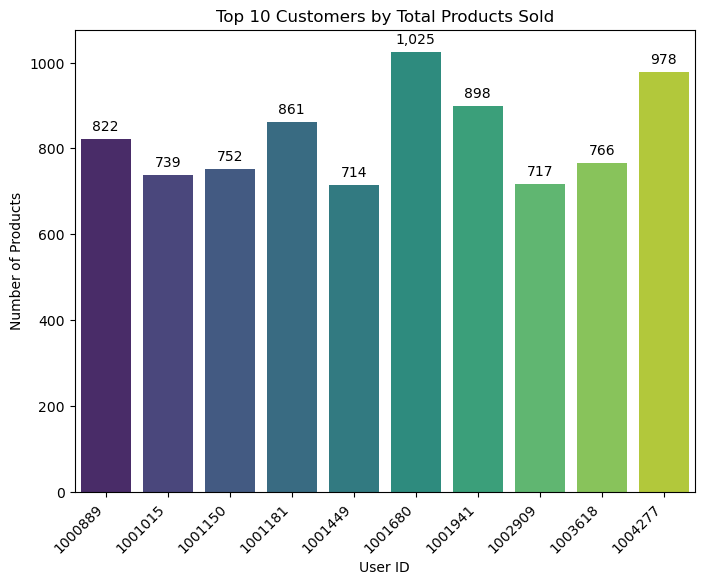

In [23]:
# Count the occurrences of each User_ID
top_user_ids = sales['User_ID'].value_counts().reset_index().head(10)

#plot the data
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='User_ID', y='count', data=top_user_ids, palette="viridis") 
plt.title('Top 10 Customers by Total Products Sold')
plt.xlabel('User ID')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for p in barplot.patches:
    barplot.annotate(format(int(p.get_height()), ','),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9), 
                     textcoords='offset points')


plt.show()

The **top 10 Customers** who has Purchased **more number of Products** in the Black Friday sales are **'1001680', '1004277', '1001941', '1001181', '1000889', '1003618', '1001150', '1002909' and '1001449'**

### Customers who has more purchasing power

In [1]:
"""
Group by 'User_ID' and calculating the sum of purchases for each user.
Selecting the top 10 users with the highest total purchase amounts.
Renaming the 'Purchase' column to 'Total_Purchase_Amount' for clarity.
"""
top_10_customers = sales.groupby('User_ID')['Purchase'].sum().nlargest(10).reset_index().rename(
    columns = {'Purchase':'Total_Purchase_Amount'})

# Plotting the data
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x ='User_ID', y= 'Total_Purchase_Amount', data= top_10_customers,palette="viridis")
plt.title('Top 10 Spenders')
plt.xlabel('User ID')
plt.ylabel('Total Purchase Amount')

# Annotate each bar with its value
for p in barplot.patches:
    barplot.annotate(format(int(p.get_height()), ','),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9), 
                     textcoords='offset points')

# Show the actual values on the y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

NameError: name 'sales' is not defined

The customer who has **highest purchasing power** is 1004277

## **2.Products**

### Top 20 selling Products in the sales

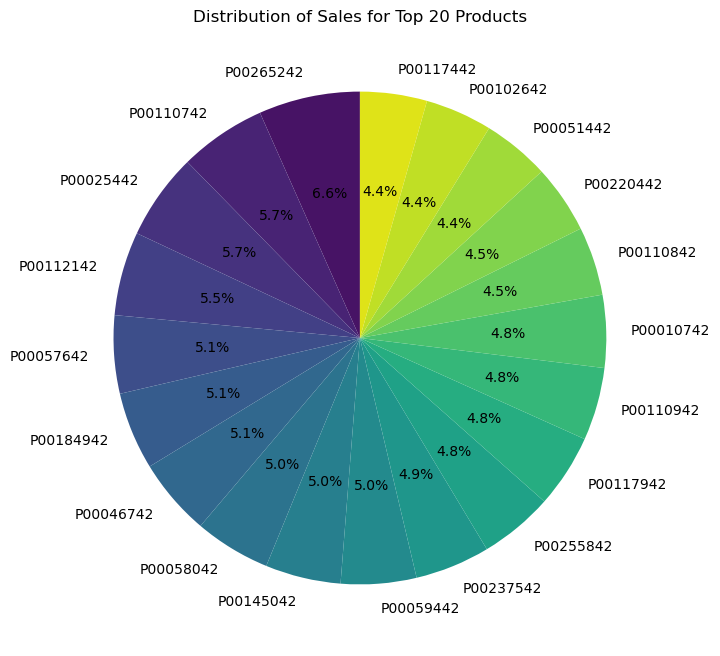

In [25]:
# Group by 'Product_ID' and 'User_ID' and calculate the sum of each group
top_selling_products = sales.groupby(['Product_ID','User_ID']).sum().reset_index()

# Count the occurrences of each 'Product_ID' to determine the top selling products
top_selling_products = top_selling_products['Product_ID'].value_counts().reset_index().head(20)

# plot the data
plt.figure(figsize=(8, 8))
plt.pie(top_selling_products['count'], labels=top_selling_products['Product_ID'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(top_selling_products)))
plt.title('Distribution of Sales for Top 20 Products')
plt.show()

### Top 10 Products which generated highest revenue

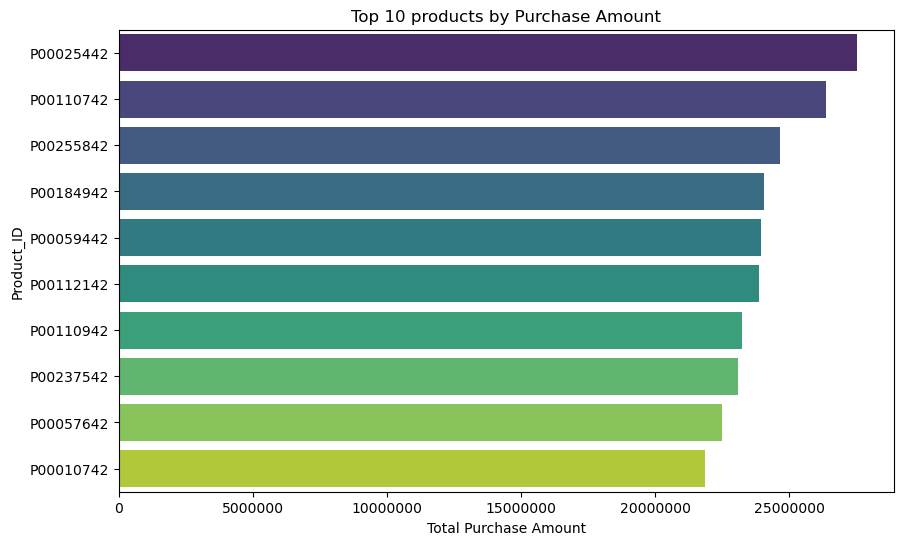

In [26]:
# Calculate total revenue generated for each product by grouping the data by 'Product_ID' and summing the 'Purchase' column
Highest_revenue_products = sales.groupby(['Product_ID'])['Purchase'].sum().nlargest(10).reset_index()

#plot the data
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Purchase', y='Product_ID', data=Highest_revenue_products, palette="viridis", orient='h')
plt.title('Top 10 products by Purchase Amount')
plt.xlabel('Total Purchase Amount')
#plt.xticks(rotation=45, ha = 'right')
plt.ylabel('Product_ID')

plt.gca().get_xaxis().get_major_formatter().set_scientific(False)

plt.show()

### Top 10 Most Frequent Products brought by Females 

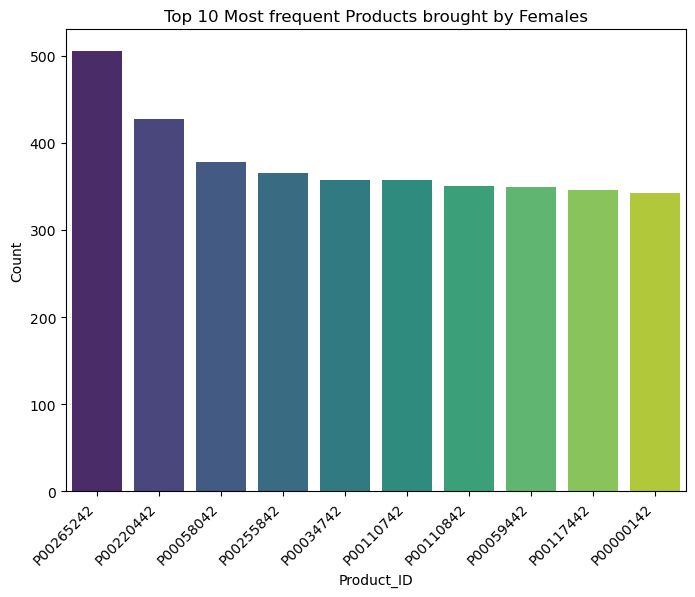

In [27]:
#count number of times Product brought by particualar gender grouping product_id and gender
top_Products = sales.groupby(['Product_ID','Gender']).size().reset_index(name ='Product_count')

#selection top 10 most frequest products brought by females 
top_Products_Female = top_Products[top_Products['Gender']=='F'].sort_values(by='Product_count',ascending = False).reset_index(drop='index').head(10)

#plot the data
plt.figure(figsize=(8,6))
sns.barplot(x = 'Product_ID', y = 'Product_count', data = top_Products_Female, palette = 'viridis')
plt.title('Top 10 Most frequent Products brought by Females')
plt.xlabel('Product_ID')
plt.xticks(rotation = 45, ha= 'right')
plt.ylabel('Count')

plt.show()

### Top Revenue generated Products by Females

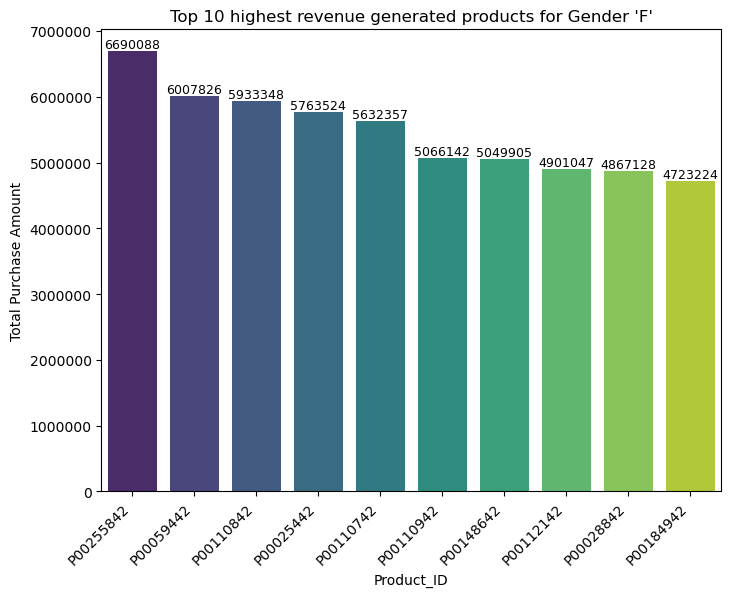

In [28]:
# Group by 'Product_ID' and 'Gender', calculating the sum of purchases
Products_by_gender = sales.groupby(['Product_ID','Gender'])['Purchase'].sum().reset_index()

# Filtering data for Female gender and sorting by purchase amount in descending order
top_revenue_products_Female = Products_by_gender[Products_by_gender['Gender']=='F'].sort_values(by='Purchase',ascending=False).reset_index(drop ='index')

# Selecting the top 10 products with the highest purchase amounts for Females
top_10_revenue_products_Female = top_revenue_products_Female.head(10)

# Plot the data using Seaborn
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Product_ID', y='Purchase', data=top_10_revenue_products_Female, palette="viridis")

# Add values inside the bars using ax.bar_label
ax = barplot.axes
ax.bar_label(barplot.containers[0], fmt='%d', label_type='edge', fontsize=9, color='black')

#plot the data
plt.title("Top 10 highest revenue generated products for Gender 'F'")
plt.xlabel('Product_ID')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Purchase Amount')

#set the actual y values as labels
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Top 10 Most Frequent Products brought by Males

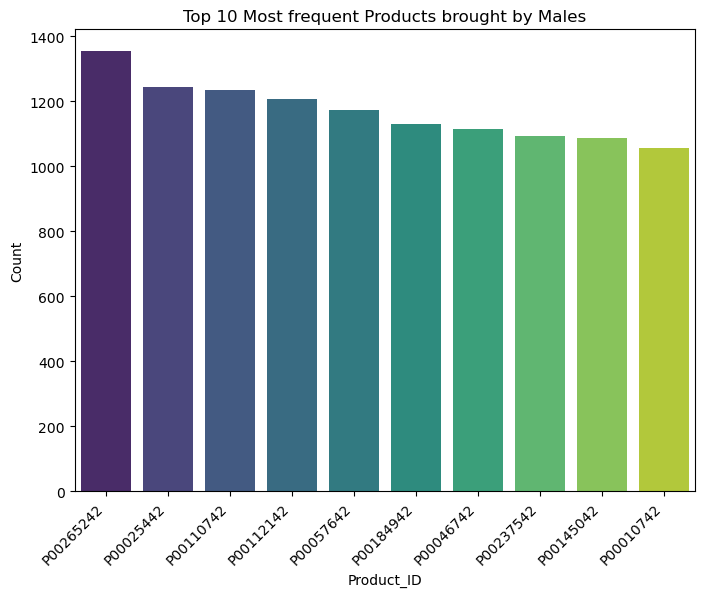

In [29]:
#selection top 10 most frequest products brought by females 
top_Products_Male = top_Products[top_Products['Gender']=='M'].sort_values(by='Product_count',ascending = False).reset_index(drop='index').head(10)

#plot the data
plt.figure(figsize=(8,6))
sns.barplot(x = 'Product_ID', y = 'Product_count', data = top_Products_Male, palette = 'viridis')
plt.title('Top 10 Most frequent Products brought by Males')
plt.xlabel('Product_ID')
plt.xticks(rotation = 45, ha= 'right')
plt.ylabel('Count')

plt.show()

### Top Revenue generated Products by Males

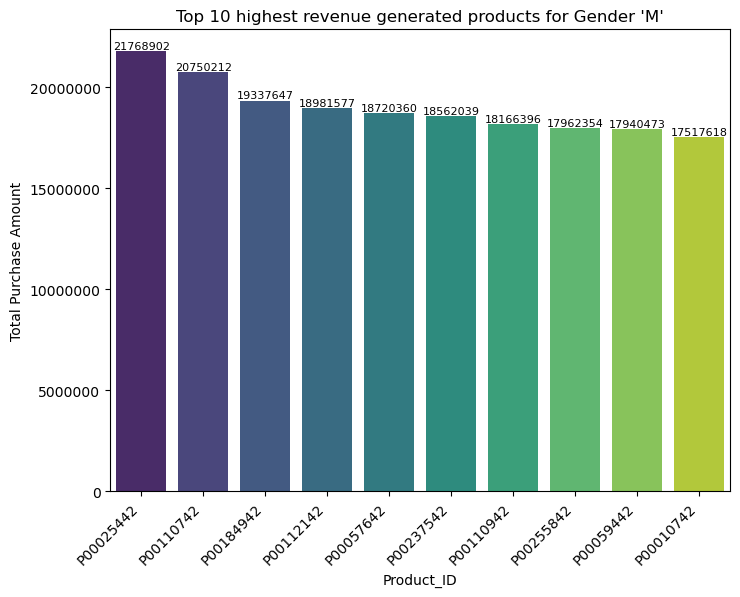

In [30]:
# Filtering data for Male gender and sorting by purchase amount in descending order
top_revenue_products_Male = Products_by_gender[Products_by_gender['Gender']=='M'].sort_values(
    by='Purchase',ascending=False).reset_index(drop ='index')

# Selecting the top 10 products with the highest purchase amounts for Males
top_10_revenue_products_Male = top_revenue_products_Male.head(10)

# Plot the data using Seaborn
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Product_ID', y='Purchase', data=top_10_revenue_products_Male, palette="viridis")

# Add values on the bars using ax.bar_label
ax = barplot.axes
ax.bar_label(barplot.containers[0], fmt='%d', label_type='edge', fontsize=8, color='black')

#plot the data
plt.title("Top 10 highest revenue generated products for Gender 'M'")
plt.xlabel('Product_ID')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Purchase Amount')

#set actual y values as labels
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()


## **3.Gender**

### Gender distribution in the data

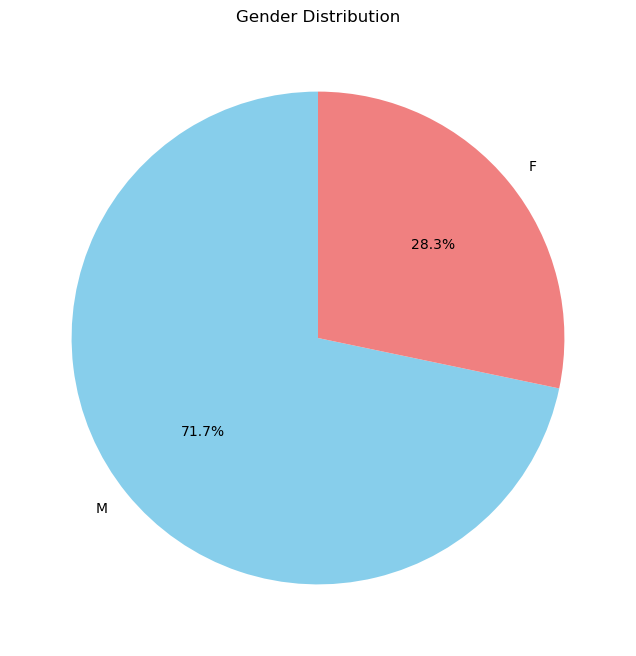

In [31]:
# Create a DataFrame with the count of purchases by gender for each user
gender_count_per_user = sales.groupby(['User_ID', 'Gender']).sum().reset_index()

# Count the occurrences of each dominant gender
dominant_gender_count = gender_count_per_user['Gender'].value_counts().reset_index()

dominant_gender_count

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_gender_count['count'], labels=dominant_gender_count['Gender'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')

# Show the pie chart
plt.show()

Most of our customers are **males**

### Purchasing power by gender

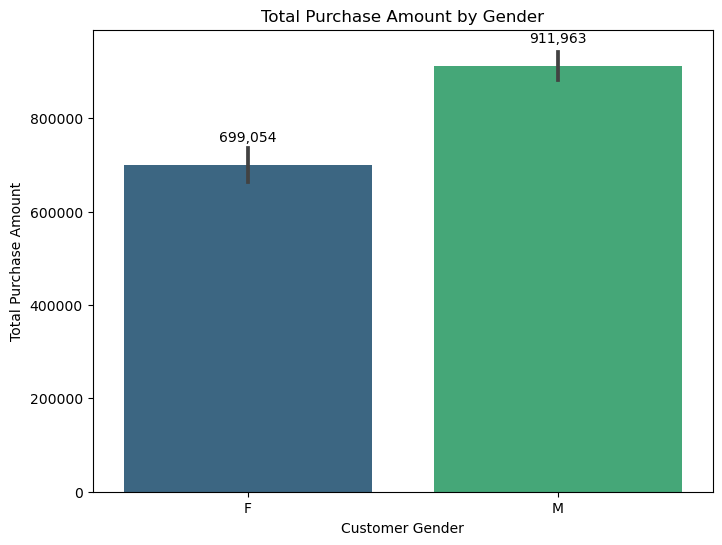

In [32]:
""" Group by 'User_ID' and 'Gender'
Calculating the sum of 'Purchase' for each group
Resetting the index to obtain a new DataFrame with a flat structure
Renaming the 'Purchase' column to 'Total_Purchase_Amount' for clarity
"""
total_purchase_by_gender = sales.groupby(['User_ID', 'Gender'])['Purchase'].sum().reset_index().rename(
    columns={'Purchase':'Total_Purchase_Amount'})

#plot the data
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Gender', y='Total_Purchase_Amount', data=total_purchase_by_gender, palette="viridis")
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Total Purchase Amount')

# Annotate each bar with its value
for p in barplot.patches:
    barplot.annotate(format(int(p.get_height()), ','),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 20), 
                     textcoords='offset points')

# Show the actual values on the y-axis
#plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

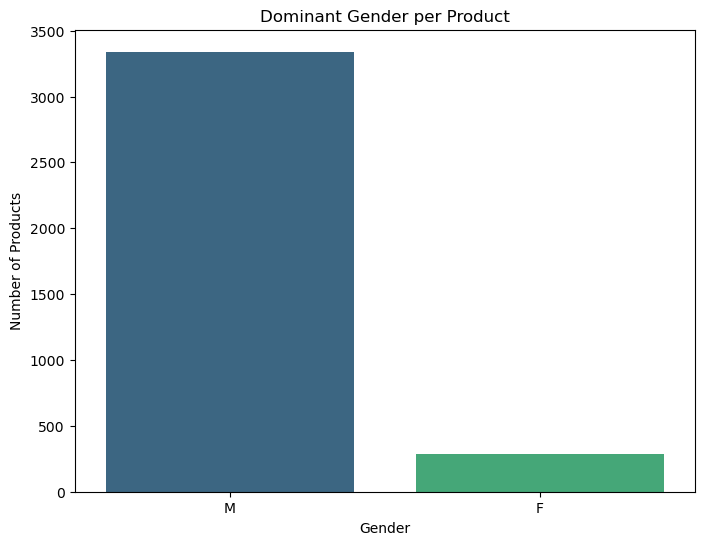

In [33]:
# Group by 'Product_ID' and 'Gender', and calculate the sum of purchases for each group
product_gender_purchase = sales.groupby(['Product_ID', 'Gender'])['Purchase'].sum().reset_index()

# Find the gender with the maximum purchase for each product
dominant_gender_per_product = product_gender_purchase.loc[product_gender_purchase.groupby('Product_ID')['Purchase'].idxmax()]

# Count the occurrences of each dominant gender across all products
dominant_gender_count = dominant_gender_per_product['Gender'].value_counts()

#plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x=dominant_gender_count.index, y=dominant_gender_count.values, palette="viridis")
plt.title('Dominant Gender per Product')
plt.xlabel('Gender')
plt.ylabel('Number of Products')
plt.show()

**Most of the revenue** for the products in the Black Friday sales is **generated by 'Males'**

### **4. Age**

**Distribution of Different Age groups in Black Friday Sales**

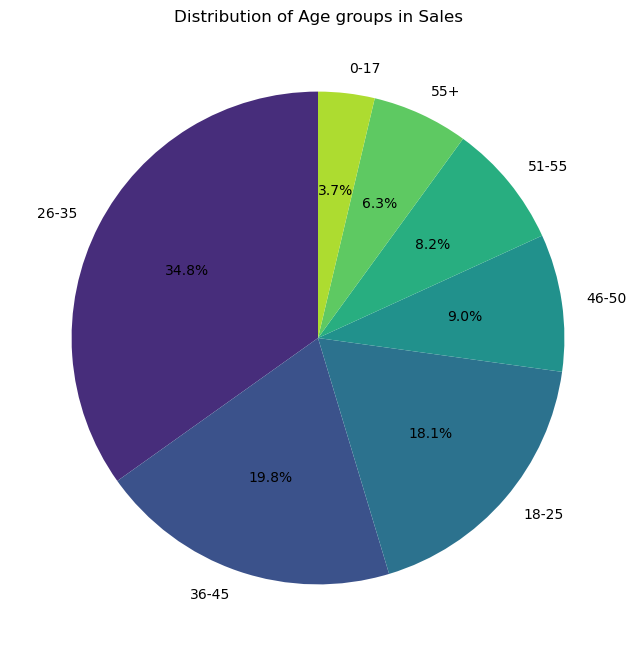

In [34]:
#group by user_id and Age 
dominant_age_group = sales.groupby(['User_ID','Age']).sum().reset_index()

dominant_age_group = dominant_age_group['Age'].value_counts().reset_index()

# plot the data
plt.figure(figsize=(8, 8))
plt.pie(dominant_age_group['count'], labels=dominant_age_group['Age'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(dominant_age_group)))
plt.title('Distribution of Age groups in Sales')
plt.show()

**Products Purchased by different Age groups**

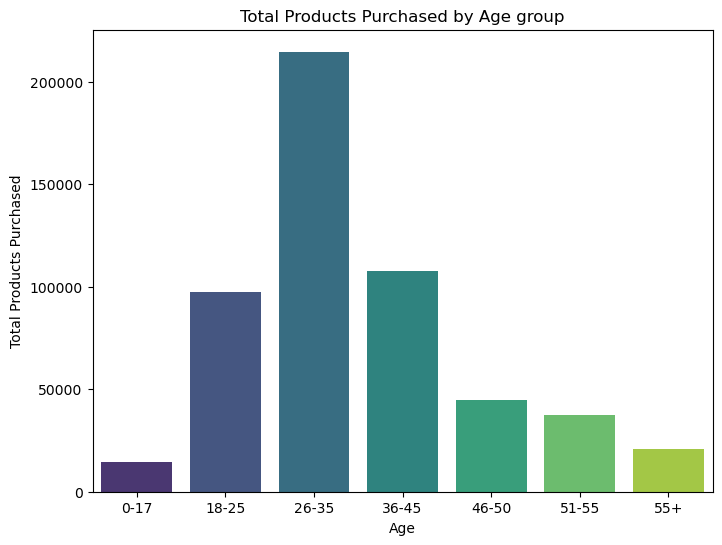

In [35]:
#group by age and product_id for product count
age_product_count = sales.groupby(['Age', 'Product_ID']).size().reset_index(name='Product_Count')

#pivot the age_product_count with age as index
age_product_count_pivot = age_product_count.pivot(index='Age', columns='Product_ID', values='Product_Count').fillna(0)

#add new column total products
age_product_count_pivot['Total_Products'] = age_product_count_pivot.sum(axis=1)

# Plot the data using Seaborn
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=age_product_count_pivot.index, y=age_product_count_pivot['Total_Products'], palette="viridis")
plt.title("Total Products Purchased by Age group")
plt.xlabel('Age')
plt.ylabel('Total Products Purchased')

plt.show()

### Purchase Amount  by each age group in the Sales

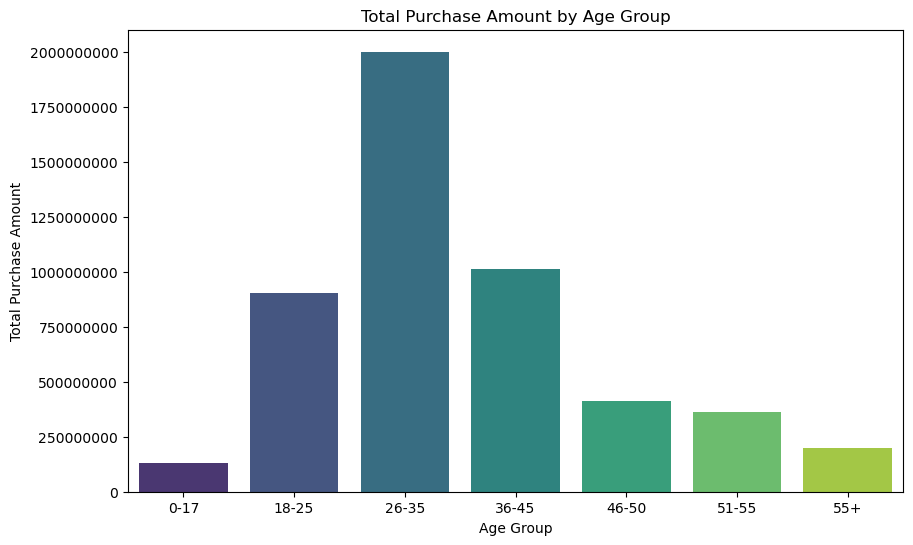

In [36]:
age_total_purchase = sales.groupby('Age')['Purchase'].sum().reset_index()

# Plotting a bar plot to visualize the total purchase amount by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Purchase', data=age_total_purchase, palette="viridis")
plt.title('Total Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Average Purchase amount by each age group

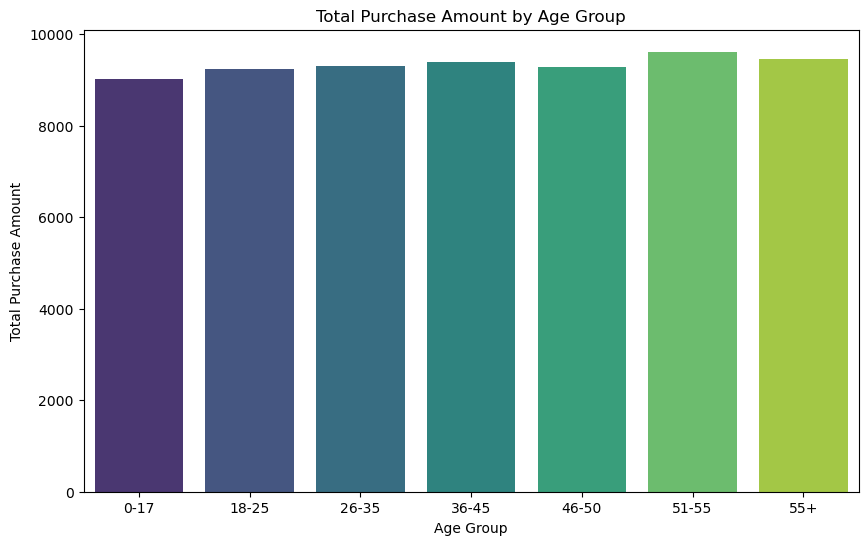

In [52]:
age_total_purchase = sales.groupby('Age')['Purchase'].mean().reset_index()

# Plotting a bar plot to visualize the total purchase amount by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Purchase', data=age_total_purchase, palette="viridis")
plt.title('Total Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Top Products purchased by each age group

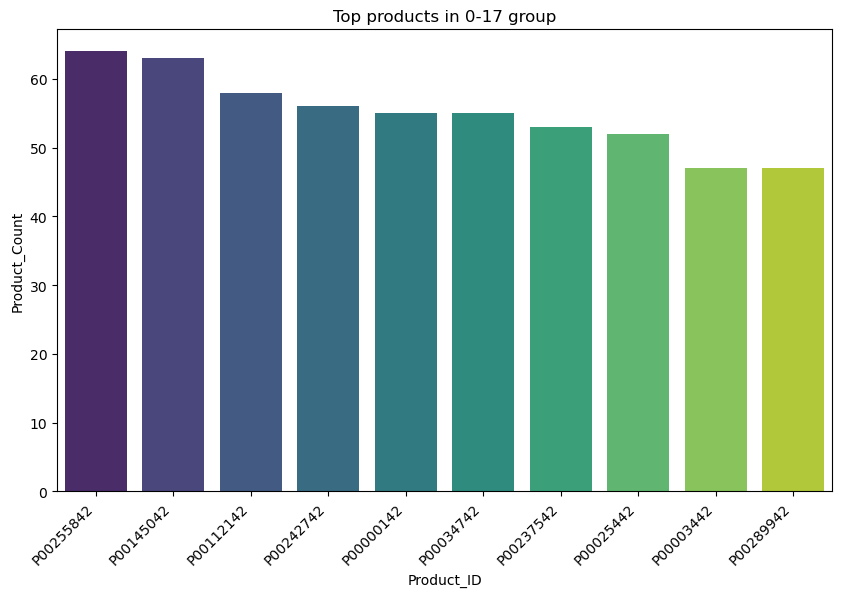

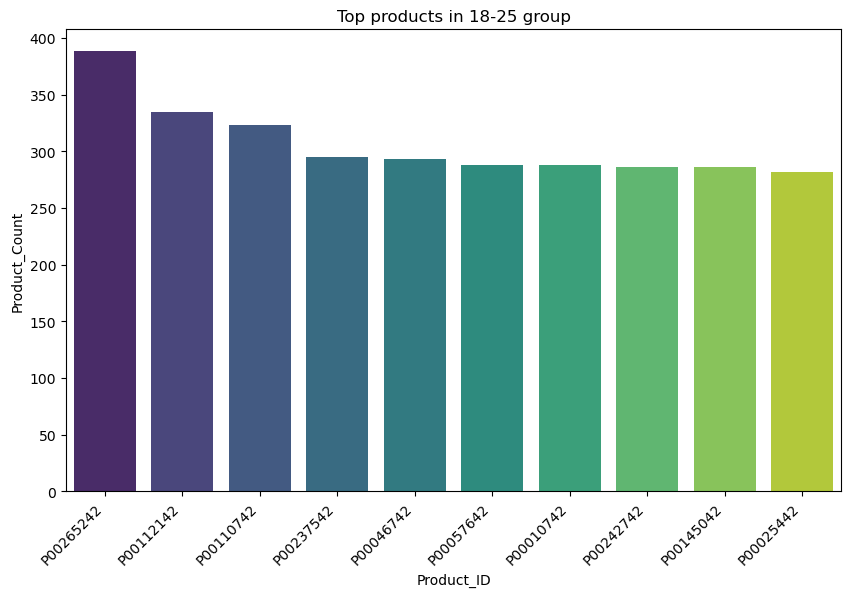

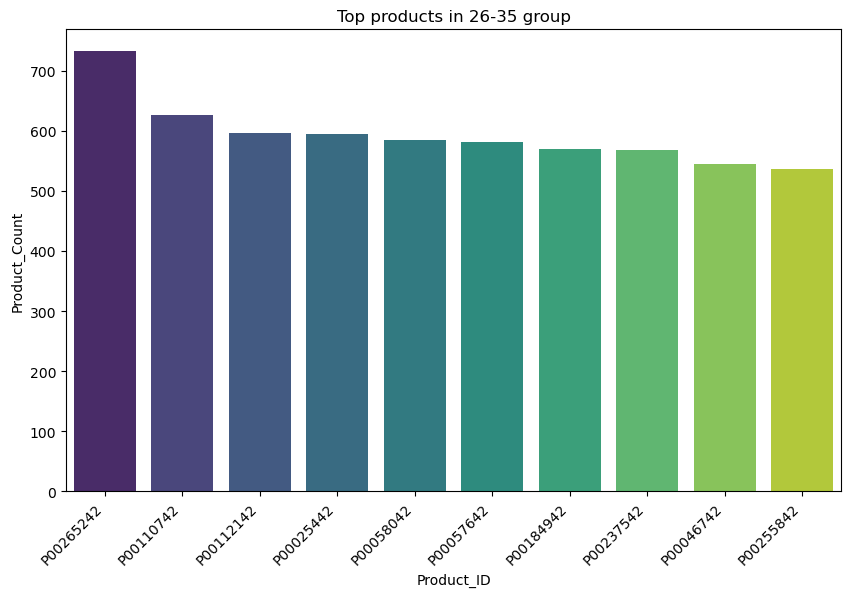

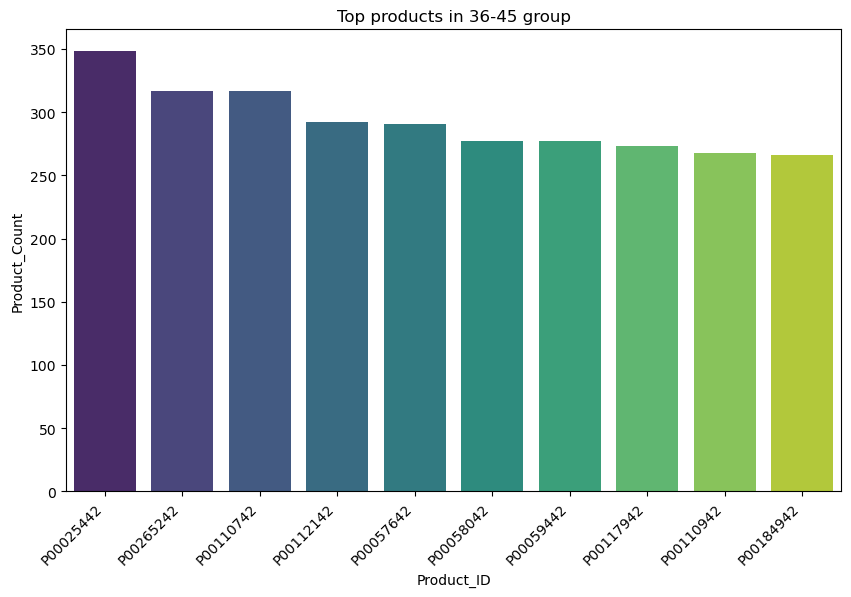

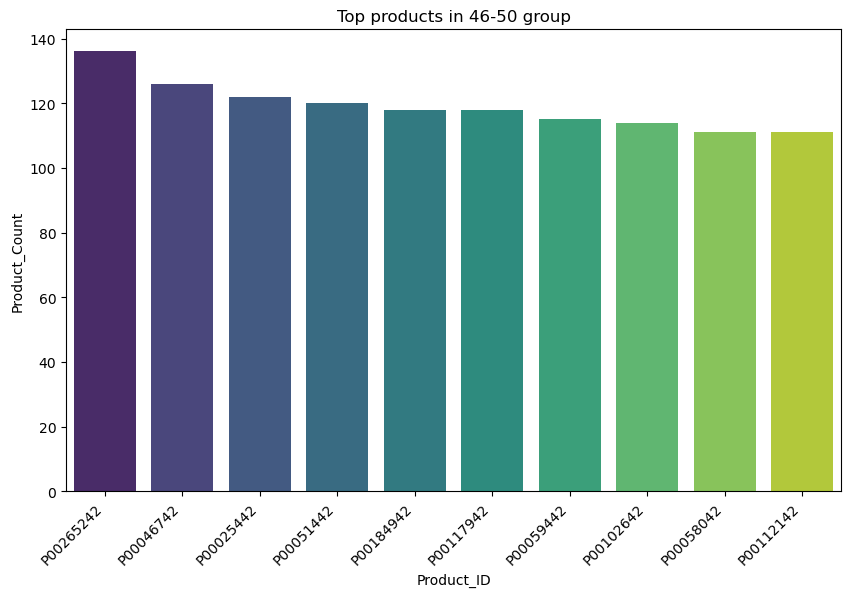

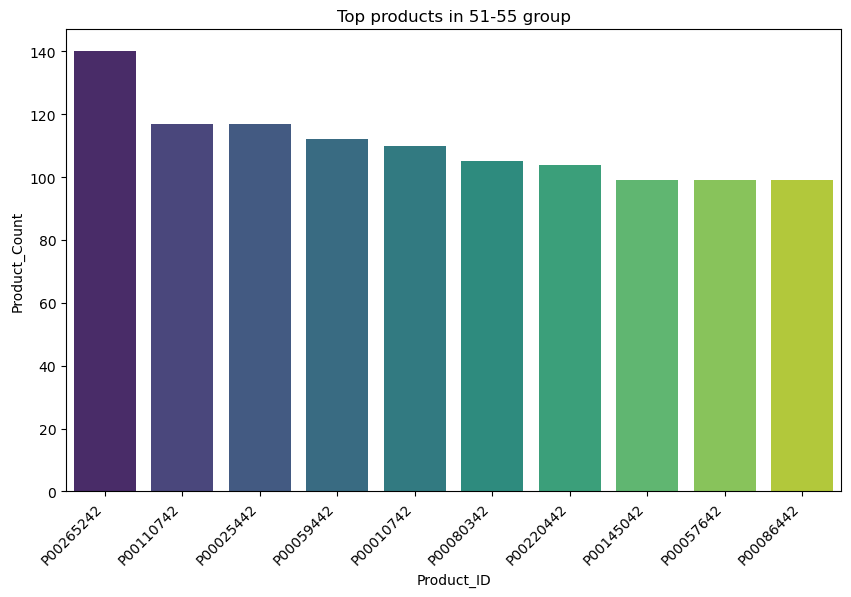

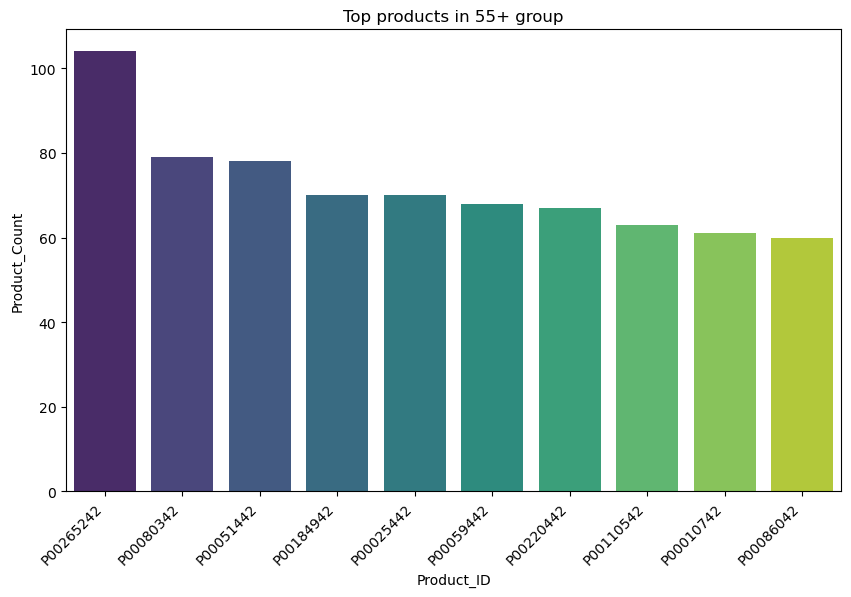

In [37]:
#group by product_id and age and product_id purchase count for each age group  
actual = sales.groupby(['Product_ID','Age']).size().reset_index(name='Product_Count')

#loop over the age groups
for i in actual['Age'].unique():
    #selecting the products and sorting them by descending in each age group
    top_products = actual[actual['Age']==i].sort_values(by='Product_Count',ascending = False).reset_index(drop = 'index')
    
    plt.figure(figsize=(10, 6))
    
    #ploting the bar plot for top 10 products in each group
    sns.barplot(x='Product_ID', y='Product_Count', data=top_products.head(10), palette="viridis")
    
    plt.title(f'Top products in {i} group')
    plt.xlabel('Product_ID')
    plt.ylabel('Product_Count')
    plt.xticks(rotation=45,ha='right')
    
    plt.show()


## 5. Occupation

### Dominant Occupation in the sales

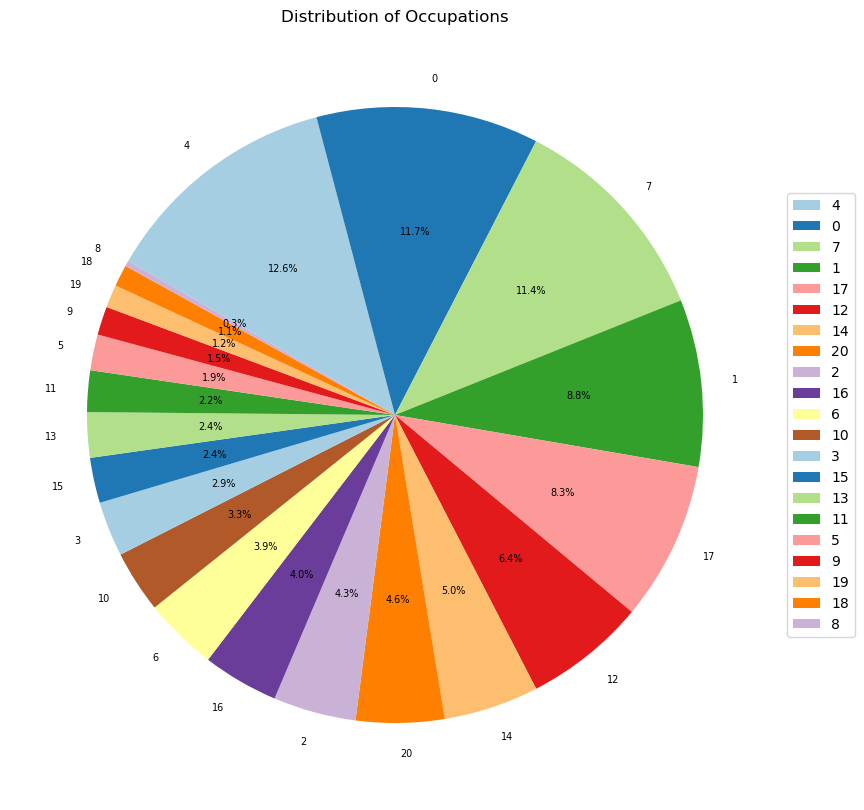

In [38]:
#group by user id and Occupation
occupation_Count = sales.groupby(['User_ID','Occupation']).sum().reset_index()

#count of each occupation
occupation_Count = occupation_Count['Occupation'].value_counts().reset_index()

# plot the data 
plt.figure(figsize=(10,10))
sns.set_palette("Paired")
plt.pie(occupation_Count['count'], labels=occupation_Count['Occupation'], autopct='%1.1f%%', startangle=150, 
        counterclock=False, wedgeprops=dict(width=1), textprops={'fontsize':7})

#placing the legend at center left
plt.legend(occupation_Count['Occupation'], bbox_to_anchor=(1, 0.5), loc="center left")

plt.title('Distribution of Occupations')

plt.show()

### Total Products brought by each Occupation

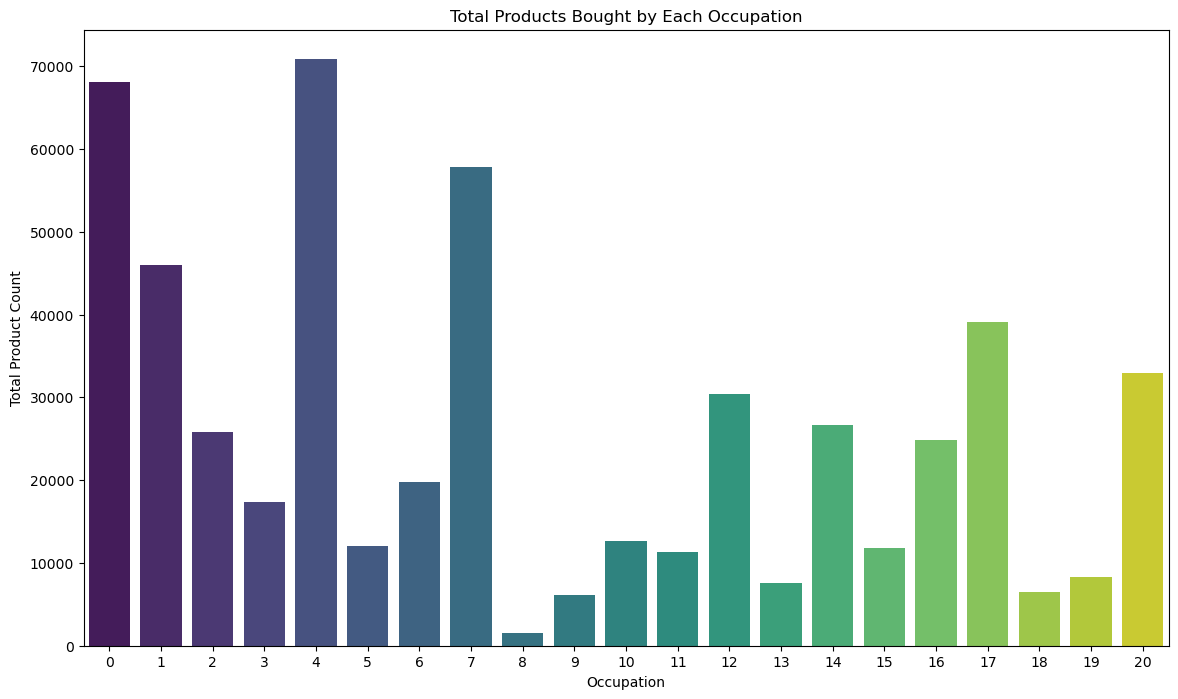

In [39]:
# Group by 'Occupation' and calculate the sum of products for each occupation
occupation_total_products = sales.groupby('Occupation')['Product_ID'].count().reset_index(name='Total_Products')

# Plotting a bar plot to visualize the total products bought by each occupation
plt.figure(figsize=(14, 8))
sns.barplot(x='Occupation', y='Total_Products', data=occupation_total_products, palette="viridis")
plt.title('Total Products Bought by Each Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Product Count')

plt.show()

### Total Revenue generated from each Occupation

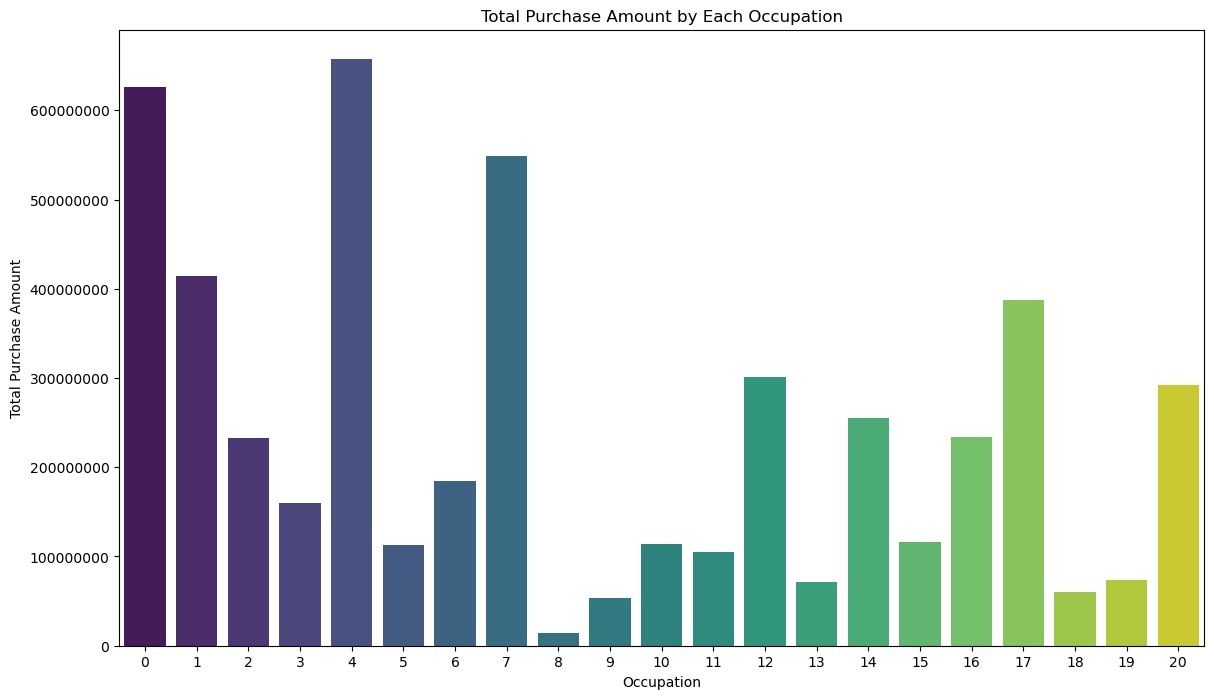

In [4]:
# Group by 'Occupation' and calculate the sum of purchases for each occupation
occupation_total_purchase = sales.groupby('Occupation')['Purchase'].sum().reset_index(name='Total_Purchase')

# Plotting a bar plot to visualize the total purchase amount by each occupation
plt.figure(figsize=(14, 8))
sns.barplot(x='Occupation', y='Total_Purchase', data=occupation_total_purchase, palette="viridis")
plt.title('Total Purchase Amount by Each Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Purchase Amount')

#set actual y values as labels
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Number of Product brought by each Occupation in each city

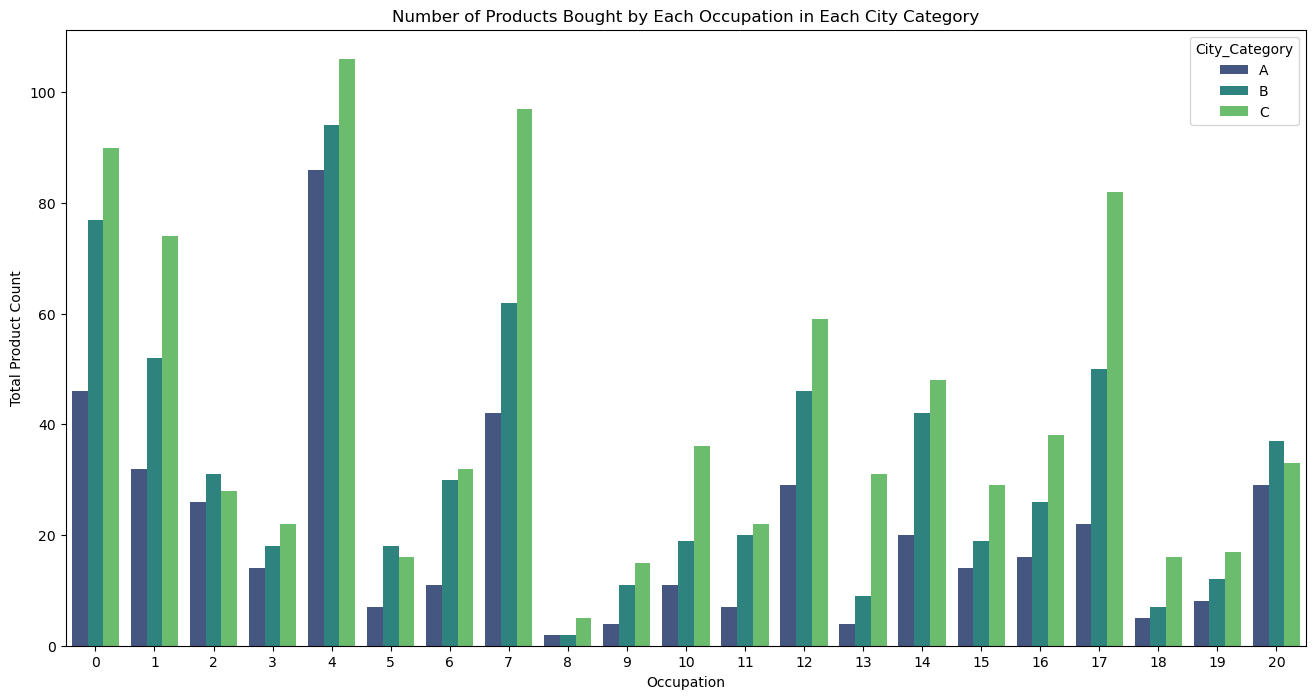

In [41]:
# Group by 'Occupation', 'City_Category', and 'Product_ID', and calculate the count of products for each group
occupation_city_product_count = sales.groupby(['Occupation', 'City_Category', 'Product_ID']).size().reset_index(name='Product_Count')

# Find the occupation with the maximum product count in each city category
dominant_occupation_per_city = occupation_city_product_count.loc[occupation_city_product_count.groupby(['City_Category', 'Occupation'])['Product_Count'].idxmax()]

# Plotting a grouped bar plot to visualize the number of products bought by each occupation in each city category
plt.figure(figsize=(16, 8))
sns.barplot(x='Occupation', y='Product_Count', hue='City_Category', data=dominant_occupation_per_city, palette="viridis")
plt.title('Number of Products Bought by Each Occupation in Each City Category')
plt.xlabel('Occupation')
plt.ylabel('Total Product Count')

plt.show()

### Revenue generated by each Occupation in each city

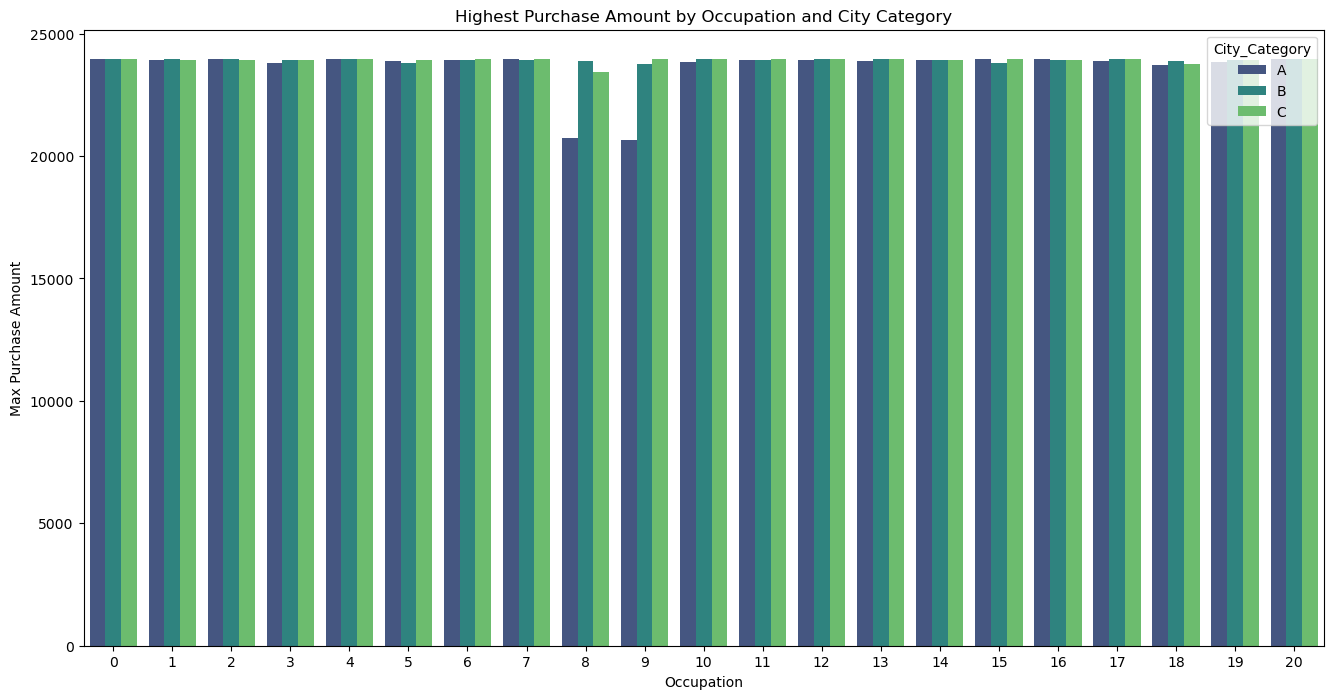

In [42]:
occupation_city_purchase_max = sales.groupby(['Occupation', 'City_Category'])['Purchase'].max().reset_index(name='Max_Purchase')

# Plotting a bar plot to visualize the highest purchase amount for each occupation and city category
plt.figure(figsize=(16, 8))
sns.barplot(x='Occupation', y='Max_Purchase', hue='City_Category', data=occupation_city_purchase_max, palette="viridis")
plt.title('Highest Purchase Amount by Occupation and City Category')
plt.xlabel('Occupation')
plt.ylabel('Max Purchase Amount')
plt.show()

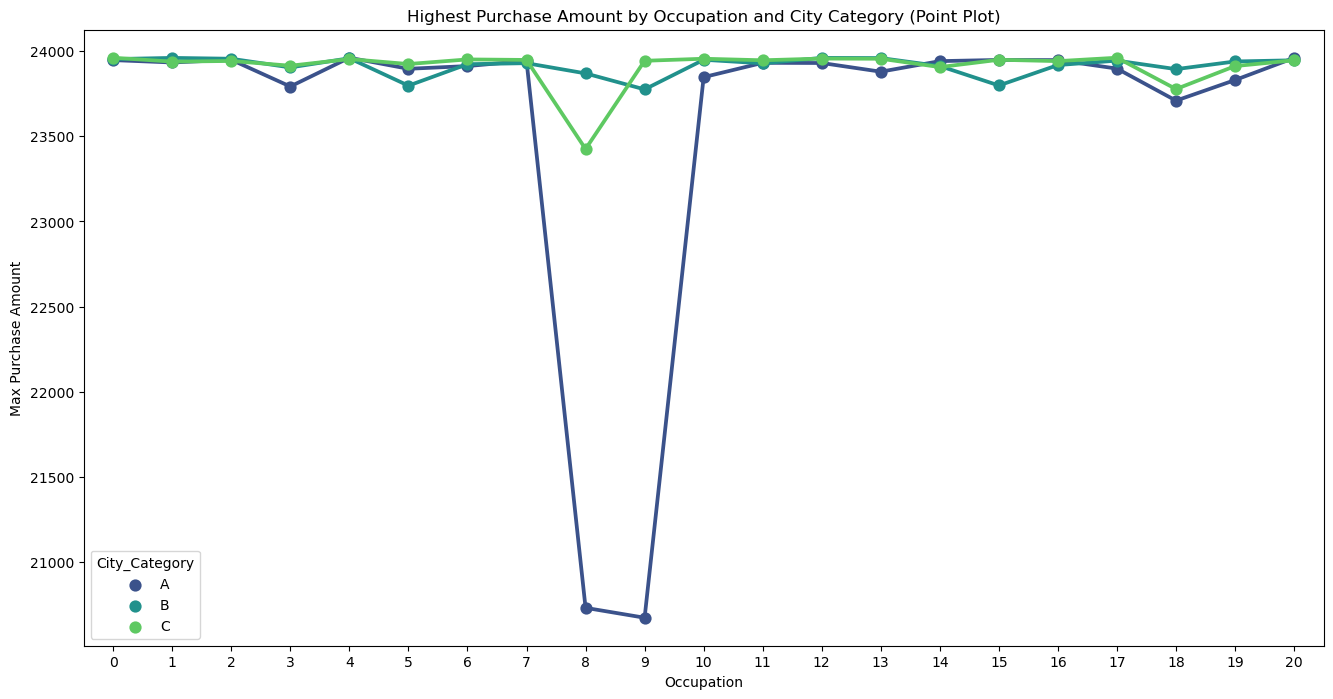

In [43]:
# Plotting a bar plot to visualize the highest purchase amount for each occupation and city category
plt.figure(figsize=(16, 8))
sns.pointplot(x='Occupation', y='Max_Purchase', hue='City_Category', data=occupation_city_purchase_max, palette="viridis")
plt.title('Highest Purchase Amount by Occupation and City Category (Point Plot)')
plt.xlabel('Occupation')
plt.ylabel('Max Purchase Amount')
plt.show()

### Total Purchase amount from each occupation in each city

C:\Users\This Pc\AppData\Local\Temp\ipykernel_12896\934802912.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Occupation', y='Purchase', hue='City_Category', data=occupation_city_product_count, palette="viridis", ci = None)


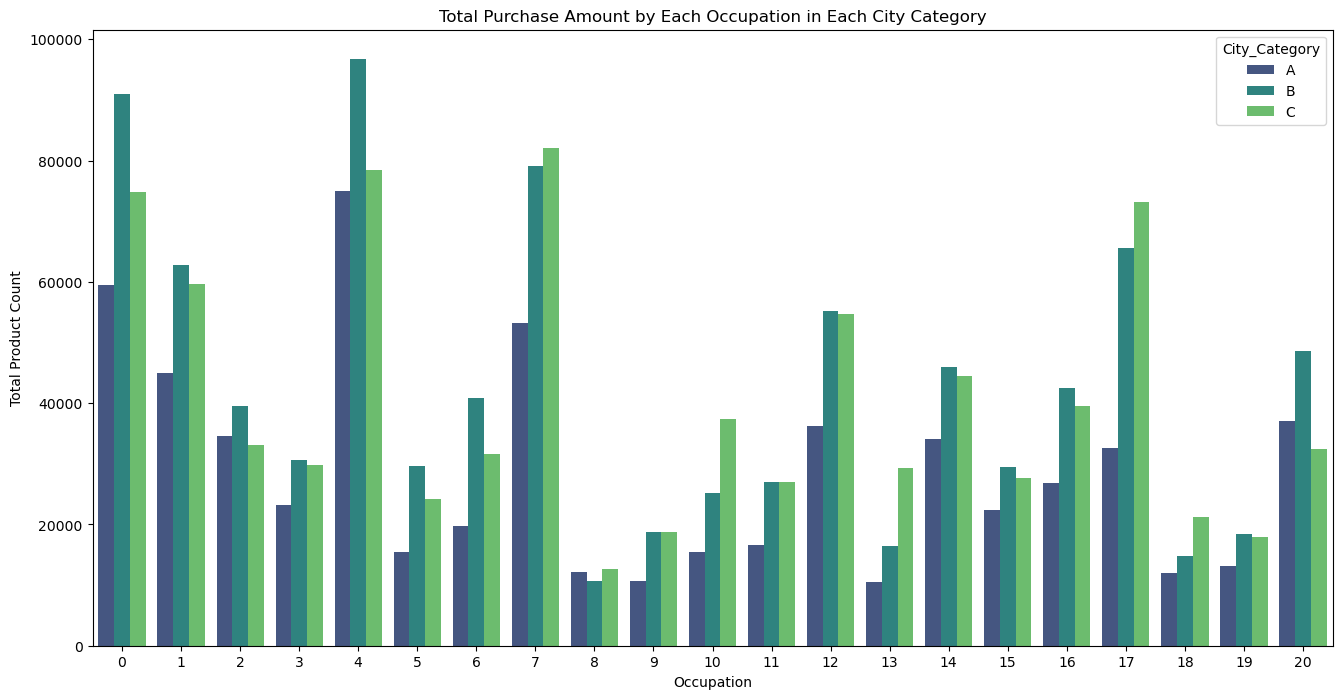

In [57]:
occupation_city_product_count = sales.groupby(['Occupation', 'City_Category', 'Product_ID'])['Purchase'].sum().reset_index()
occupation_city_product_count

# Plotting a grouped bar plot to visualize the purchase amouny by each occupation in each city category
plt.figure(figsize=(16, 8))
sns.barplot(x='Occupation', y='Purchase', hue='City_Category', data=occupation_city_product_count, palette="viridis", ci = None)
plt.title('Total Purchase Amount by Each Occupation in Each City Category')
plt.xlabel('Occupation')
plt.ylabel('Total Product Count')

plt.show()

### Average Purchase amount from each occupation in each city

C:\Users\This Pc\AppData\Local\Temp\ipykernel_12896\3354873582.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Occupation', y='Purchase', hue='City_Category', data=occupation_city_product_count, palette="viridis", ci = None)


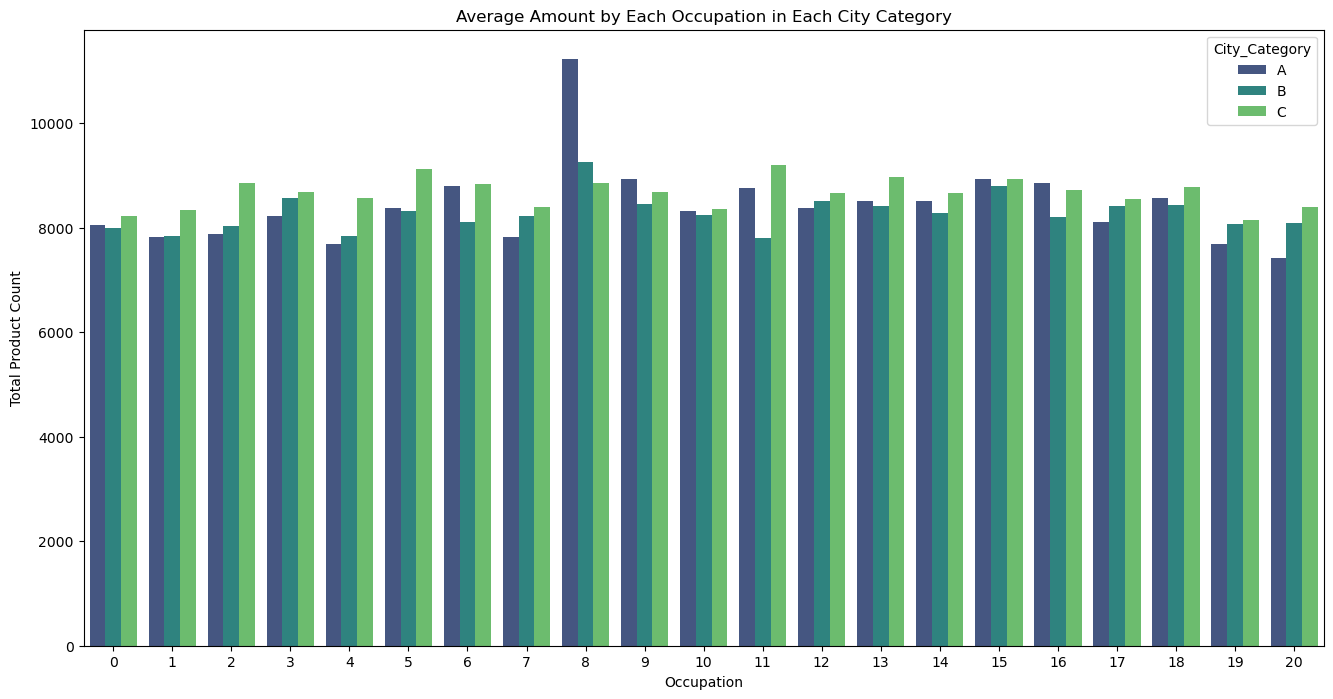

In [58]:
occupation_city_product_count = sales.groupby(['Occupation', 'City_Category', 'Product_ID'])['Purchase'].mean().reset_index()
occupation_city_product_count

# Plotting a grouped bar plot to visualize the purchase amouny by each occupation in each city category
plt.figure(figsize=(16, 8))
sns.barplot(x='Occupation', y='Purchase', hue='City_Category', data=occupation_city_product_count, palette="viridis", ci = None)
plt.title('Average Amount by Each Occupation in Each City Category')
plt.xlabel('Occupation')
plt.ylabel('Total Product Count')

plt.show()

## 6. City Categories

### Distriution of Users in each City

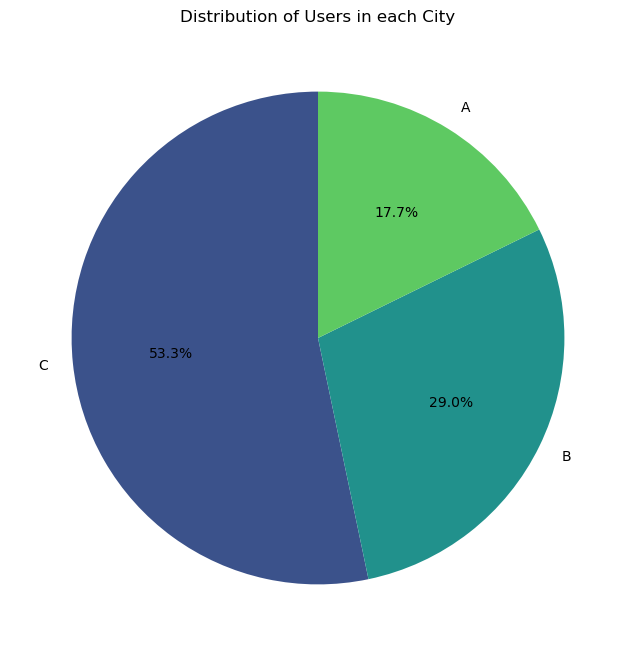

In [44]:
total_users_each_city = sales.groupby(['User_ID','City_Category']).count().reset_index()

total_users_city = total_users_each_city['City_Category']

city_category_counts = total_users_city.value_counts().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(city_category_counts['count'], labels=city_category_counts['City_Category'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(city_category_counts)))
plt.title('Distribution of Users in each City')
plt.show()

### Revenue Generated From Each City

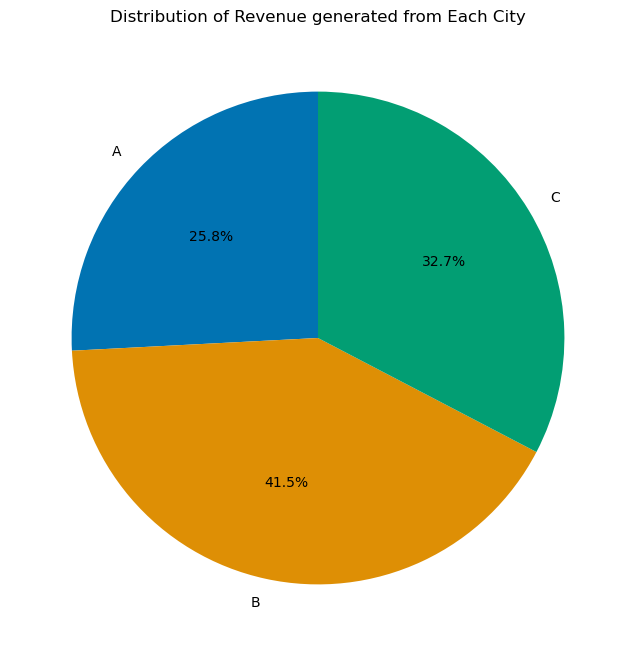

In [45]:
# Group by Product_ID and City_Category, sum the Purchase amounts, and reset the index
products_city = sales.groupby(['Product_ID', 'City_Category'])['Purchase'].sum().reset_index()

# Create an empty DataFrame to store the total purchase for each city category
total_purchase_per_city = pd.DataFrame(columns=['City_Category', 'Total_Purchase'])

# Iterate through unique city categories
for i in products_city['City_Category'].unique():
    total = products_city[products_city['City_Category'] == i]['Purchase'].sum()
    
    # Add a new row to the total_purchase_per_city DataFrame
    # Append the results to the total_purchase_per_city DataFrame
    total_purchase_per_city.loc[len(total_purchase_per_city)] = [i, total]
    
# plot the data 
plt.figure(figsize=(8, 8))
plt.pie(total_purchase_per_city['Total_Purchase'], labels=total_purchase_per_city['City_Category'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind', len(total_purchase_per_city)))
plt.title('Distribution of Revenue generated from Each City')
plt.show()

### Dominant Age Group which Purchased More Number of Products in each city

C:\Users\This Pc\AppData\Local\Temp\ipykernel_12896\2009530792.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='City_Category', y='User_Count', hue='Age', data=city_age_user_count, palette="cubehelix", ci=None)


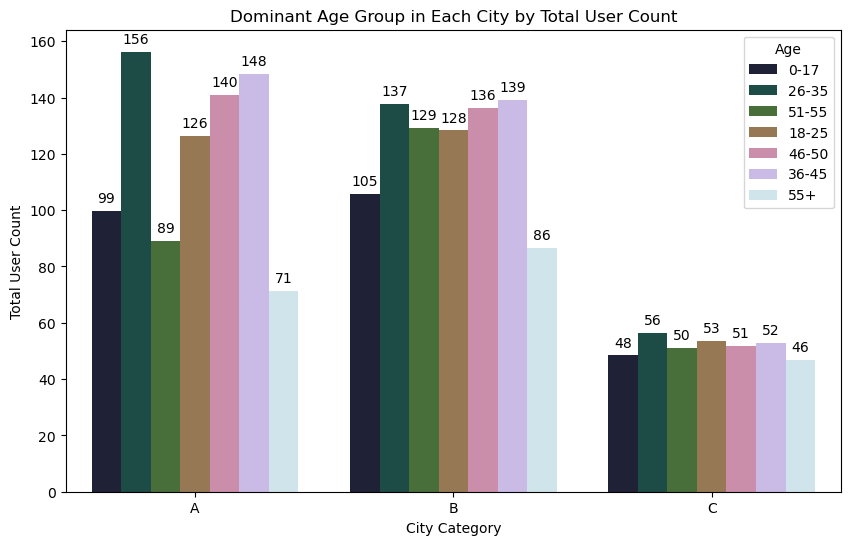

In [46]:
# Group by 'City_Category', 'User_ID', and 'Age', and count the unique users in each age group in each city
city_age_user_count = sales.groupby(['City_Category', 'User_ID', 'Age']).size().reset_index(name='User_Count')

# Plotting a bar plot to visualize the dominant age group in each city by total user count
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='City_Category', y='User_Count', hue='Age', data=city_age_user_count, palette="cubehelix", ci=None)
plt.title('Dominant Age Group in Each City by Total User Count')
plt.xlabel('City Category')
plt.ylabel('Total User Count')

# Annotate each bar with its value
for p in barplot.patches:
    barplot.annotate(format(int(p.get_height()), ','),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9), 
                     textcoords='offset points')
    
    
plt.show()

### Age Group generated most revenue in each city

C:\Users\This Pc\AppData\Local\Temp\ipykernel_12896\3716238324.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='City_Category', y='Purchase', hue='Age', data=city_age_total_purchase, palette="cubehelix", ci=None)


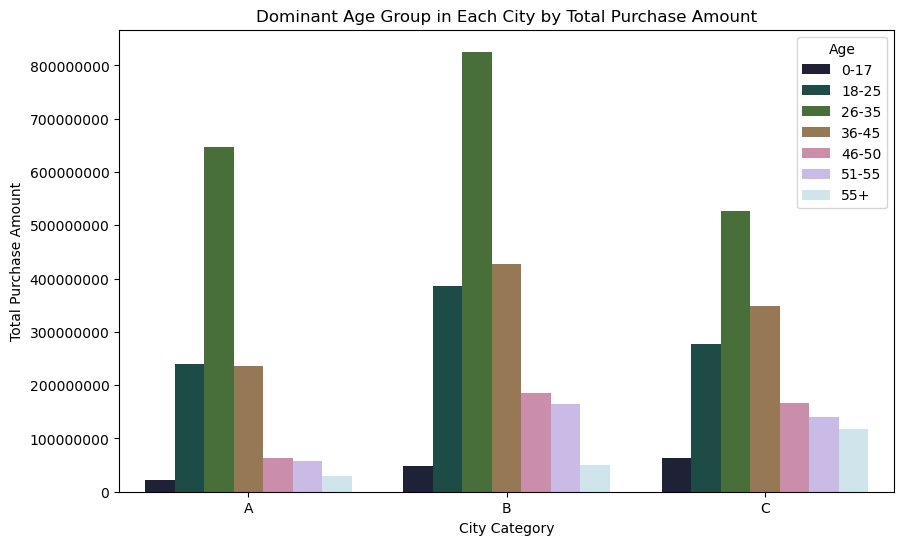

In [47]:
# Group by 'City_Category' and 'Age', and calculate the sum of purchases for each age group in each city
city_age_total_purchase = sales.groupby(['City_Category', 'Age'])['Purchase'].sum().reset_index()

# Find the dominant age group for each city based on total purchase amount
#dominant_age_per_city = city_age_total_purchase.loc[city_age_total_purchase.groupby('City_Category')['Purchase'].idxmax()]

# Plotting a bar plot to visualize the dominant age group in each city
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='City_Category', y='Purchase', hue='Age', data=city_age_total_purchase, palette="cubehelix", ci=None)
plt.title('Dominant Age Group in Each City by Total Purchase Amount')
plt.xlabel('City Category')
plt.ylabel('Total Purchase Amount')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Dominant Gender in each City by total number of products

C:\Users\This Pc\AppData\Local\Temp\ipykernel_12896\140124957.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='City_Category', y='Gender_Count', hue='Gender', data=city_gender_user_count, palette="cubehelix", ci=None)


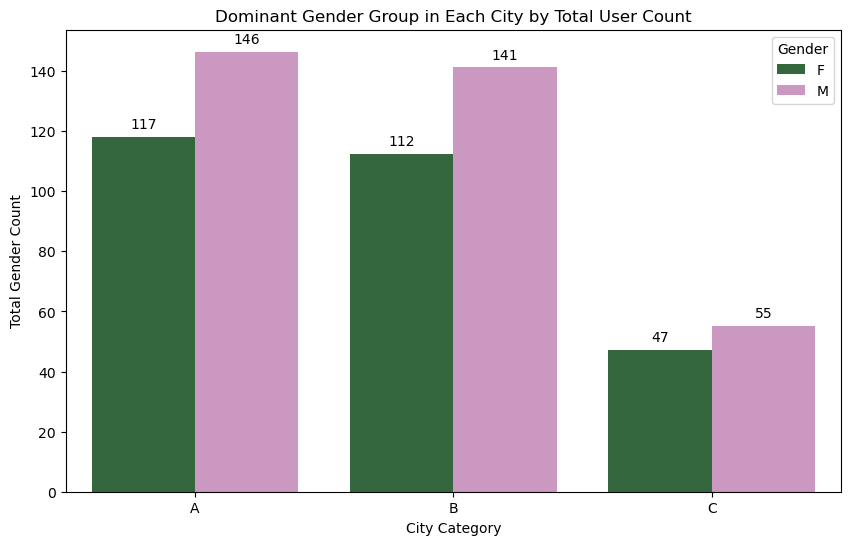

In [48]:
# Group by 'City_Category', 'User_ID', and 'Age', and count the unique users in each age group in each city
city_gender_user_count = sales.groupby(['City_Category', 'User_ID', 'Gender']).size().reset_index(name='Gender_Count')

city_gender_user_count

# Plotting a bar plot to visualize the dominant age group in each city by total user count
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='City_Category', y='Gender_Count', hue='Gender', data=city_gender_user_count, palette="cubehelix", ci=None)
plt.title('Dominant Gender Group in Each City by Total User Count')
plt.xlabel('City Category')
plt.ylabel('Total Gender Count')

# Annotate each bar with its value
for p in barplot.patches:
    barplot.annotate(format(int(p.get_height()), ','),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9), 
                     textcoords='offset points')
    
    
plt.show()


### Gender in each city by revenue generated 

C:\Users\This Pc\AppData\Local\Temp\ipykernel_12896\1925976005.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='City_Category', y='Purchase', hue='Gender', data=city_gender_total_purchase, palette="cubehelix", ci=None)


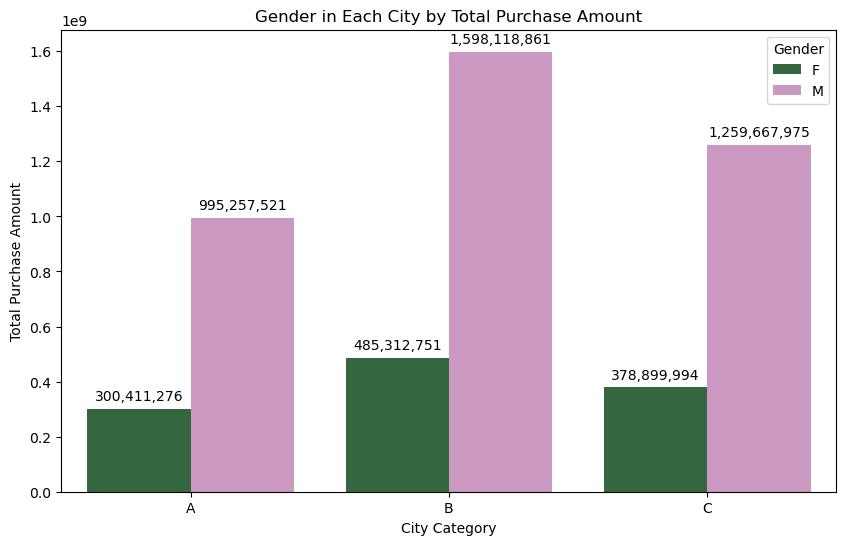

In [49]:
city_gender_total_purchase = sales.groupby(['City_Category', 'Gender'])['Purchase'].sum().reset_index()

# Plotting a bar plot to visualize the dominant age group in each city by total user count
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='City_Category', y='Purchase', hue='Gender', data=city_gender_total_purchase, palette="cubehelix", ci=None)
plt.title('Gender in Each City by Total Purchase Amount')
plt.xlabel('City Category')
plt.ylabel('Total Purchase Amount')

# Annotate each bar with its value
for p in barplot.patches:
    barplot.annotate(format(int(p.get_height()), ','),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 9), 
                     textcoords='offset points')
    
    
plt.show()

## 7. Stay in Current City in years

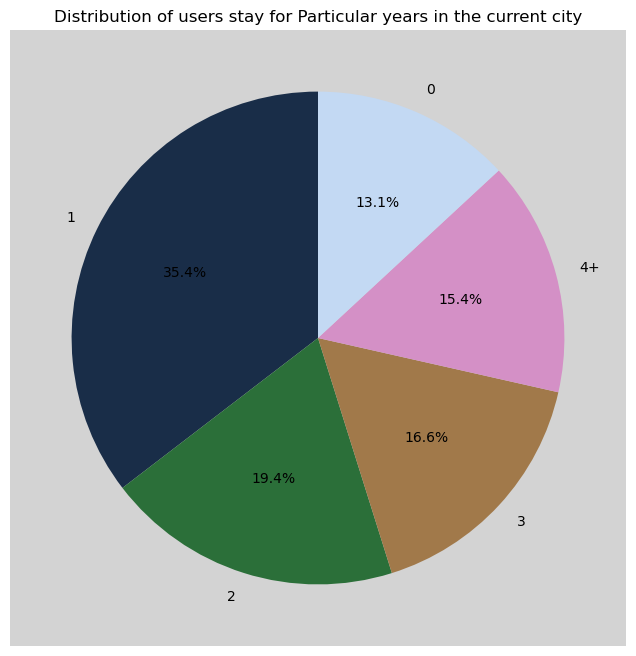

In [65]:
from matplotlib.patches import Rectangle

#group y user_id and stay in current city years
total_stay = sales.groupby(['User_ID','Stay_In_Current_City_Years']).size().reset_index()

#Total count of each stay in current city group
total_stay = total_stay['Stay_In_Current_City_Years'].value_counts().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_stay['count'], labels=total_stay['Stay_In_Current_City_Years'], autopct='%1.1f%%', textprops={'color': 'black'}, startangle=90, colors=sns.color_palette('cubehelix', len(total_stay)))

# Create a Rectangle patch covering the entire figure
background_patch = Rectangle((0, 0), 1, 1, transform=plt.gcf().transFigure, color='lightgrey', zorder=-1)

# Add the patch to the figure
plt.gcf().gca().add_patch(background_patch)

# Set the title
plt.title('Distribution of users stay for Particular years in the current city')

# Display the chart
plt.show()

In [60]:
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### revenue generated from different 'Stay_In_Current_City_Years' categories 

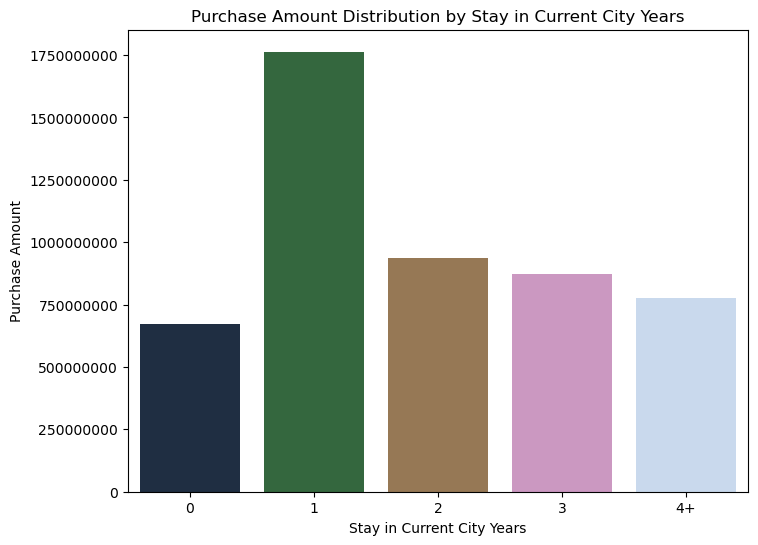

In [67]:
#group by stay_in_current_city and calculate each group purchase amount
total_amount = sales.groupby(['Stay_In_Current_City_Years'])['Purchase'].sum().reset_index()

#plot the data 
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Stay_In_Current_City_Years', y= 'Purchase', data = total_amount, palette = 'cubehelix')
plt.title('Purchase Amount Distribution by Stay in Current City Years')
plt.xlabel('Stay in Current City Years')
plt.ylabel('Purchase Amount')

#get actual y labels
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Average Amount generated from stay in current city years

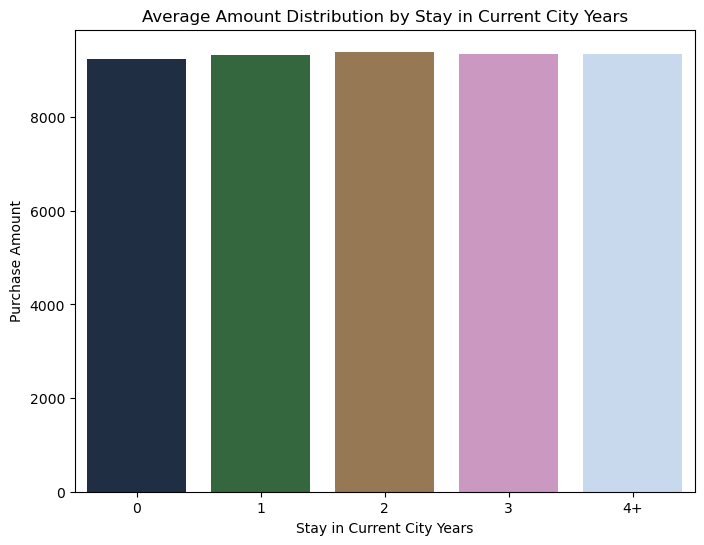

In [68]:
#average purchase amount by each stay group
total_amount = sales.groupby(['Stay_In_Current_City_Years'])['Purchase'].mean().reset_index()

#plot the data
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Stay_In_Current_City_Years', y= 'Purchase', data = total_amount, palette = 'cubehelix')
plt.title('Average Amount Distribution by Stay in Current City Years')
plt.xlabel('Stay in Current City Years')
plt.ylabel('Purchase Amount')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Total Purchase amount by each gender for each stay group

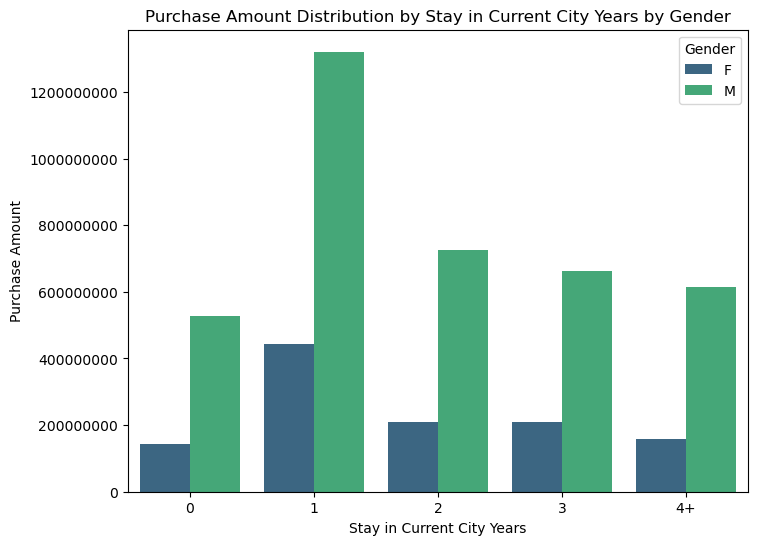

In [69]:
# Total purchase amount for stay in current city years and gender
total_amount = sales.groupby(['Stay_In_Current_City_Years','Gender'])['Purchase'].sum().reset_index()

#plot the data
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Stay_In_Current_City_Years', y= 'Purchase', hue ='Gender', data = total_amount, palette = 'viridis')
plt.title('Purchase Amount Distribution by Stay in Current City Years by Gender')
plt.xlabel('Stay in Current City Years')
plt.ylabel('Purchase Amount')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

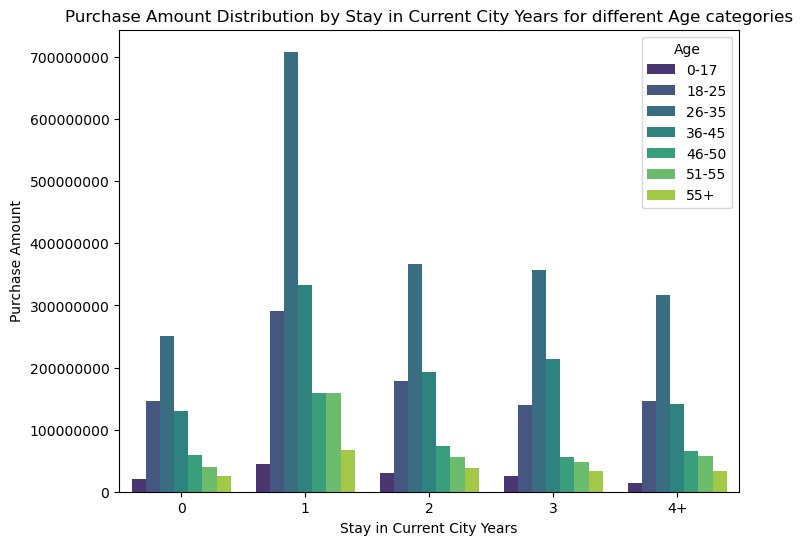

In [70]:
# Total purchase amount for stay in current city years and Age
total_amount = sales.groupby(['Stay_In_Current_City_Years','Age'])['Purchase'].sum().reset_index()

#plot the data
plt.figure(figsize = (8, 6))
sns.barplot(x = 'Stay_In_Current_City_Years', y= 'Purchase', hue ='Age', data = total_amount, palette = 'viridis')
plt.title('Purchase Amount Distribution by Stay in Current City Years for different Age categories')
plt.xlabel('Stay in Current City Years')
plt.ylabel('Purchase Amount')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

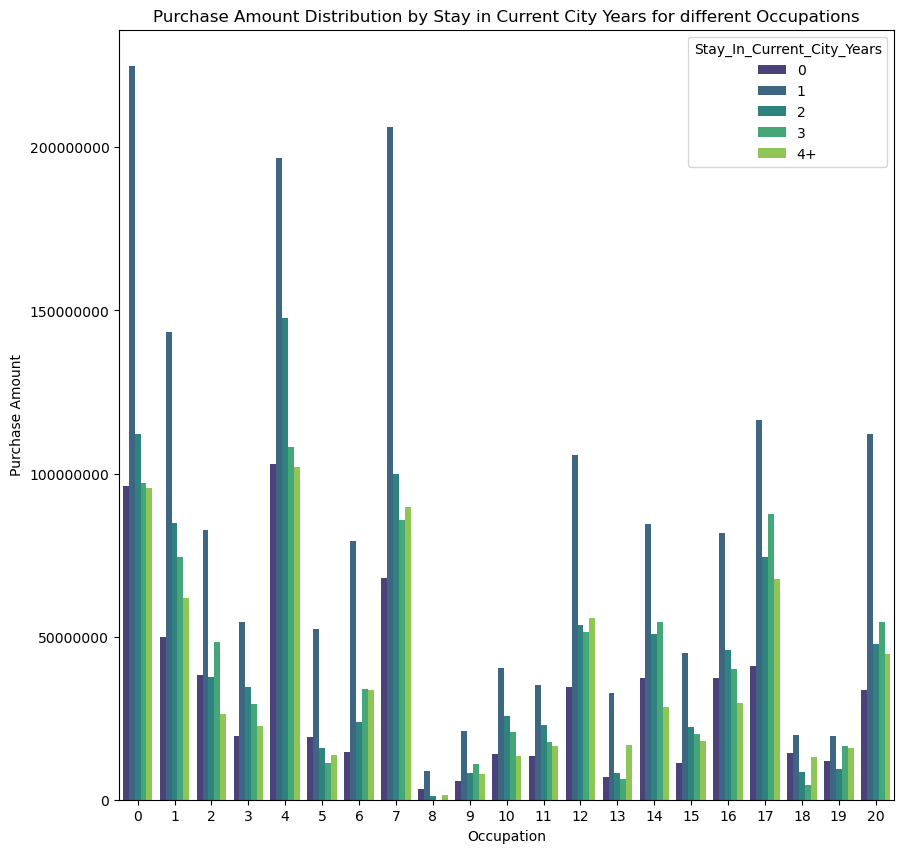

In [71]:
# Total purchase amount for stay in current city years and Occupation
total_amount = sales.groupby(['Stay_In_Current_City_Years','Occupation'])['Purchase'].sum().reset_index()

#plot the data
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Occupation', y= 'Purchase', hue ='Stay_In_Current_City_Years', data = total_amount, palette = 'viridis')
plt.title('Purchase Amount Distribution by Stay in Current City Years for different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

## 8. Marital Status

### Distribution of Marital Status of Customers 

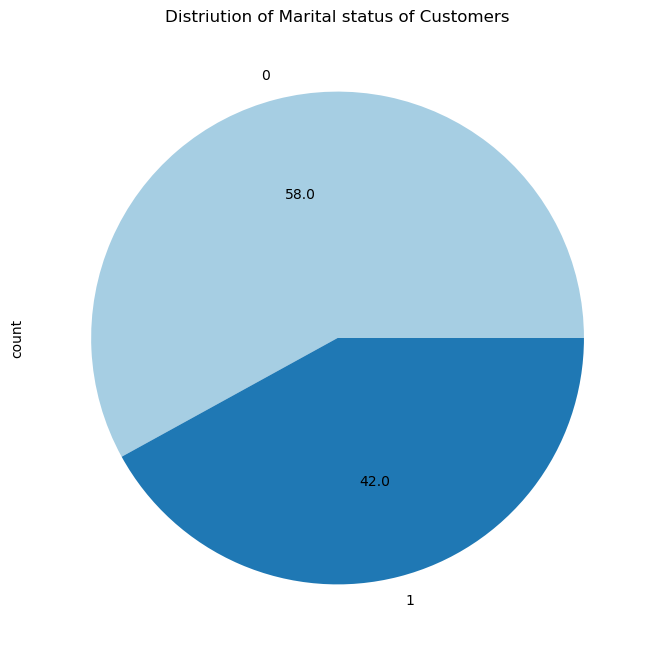

In [72]:
#group by user_id and finding marital status 
Status = sales.groupby(['User_ID'])['Marital_Status'].max().reset_index()

#plot the data 
Status['Marital_Status'].value_counts().plot(
    kind = 'pie',
    autopct = '%0.1f', 
    figsize = (8,8), 
    )

plt.title('Distriution of Marital status of Customers')

plt.show()

### Revenue generated from each marital status group

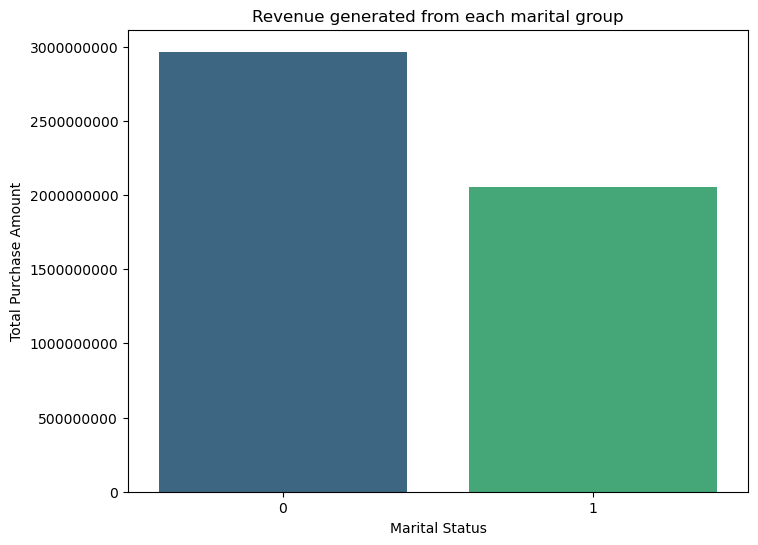

In [73]:
#Revenue generated from each marital status group
Purchase_marital_status = sales.groupby('Marital_Status')['Purchase'].sum().reset_index()

#plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x = 'Marital_Status', y = 'Purchase', data = Purchase_marital_status, palette = 'viridis')
plt.title('Revenue generated from each marital group')
plt.xlabel('Marital Status')
plt.ylabel('Total Purchase Amount')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Average Revenue generated from each marital status group

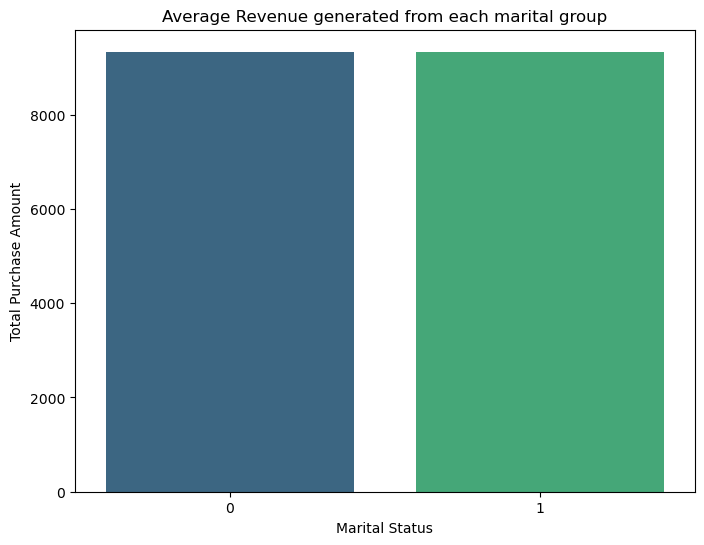

In [74]:
# Average Revenue generated from each marital status group
Purchase_marital_status = sales.groupby('Marital_Status')['Purchase'].mean().reset_index()

#plot the data
plt.figure(figsize=(8, 6))
sns.barplot(x = 'Marital_Status', y = 'Purchase', data = Purchase_marital_status, palette = 'viridis')
plt.title('Average Revenue generated from each marital group')
plt.xlabel('Marital Status')
plt.ylabel('Total Purchase Amount')

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Number of Products Purchased by each marital group

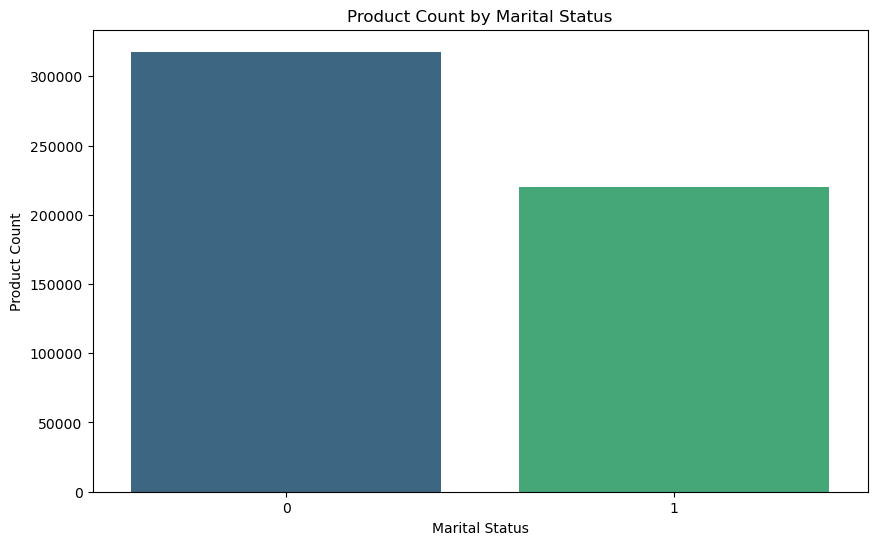

In [75]:
#group by marital status and product id and counting the products
Products_by_status = sales.groupby(['Marital_Status','Product_ID']).size().reset_index(name = 'Product_count')

#group by marital status and finding overall product count
Products_by_status = Products_by_status.groupby('Marital_Status')['Product_count'].sum().reset_index()

#plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='Product_count', data=Products_by_status, palette='viridis')
plt.title('Product Count by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Product Count')

plt.show()

### Total Products purchased by each gender in each marital status group

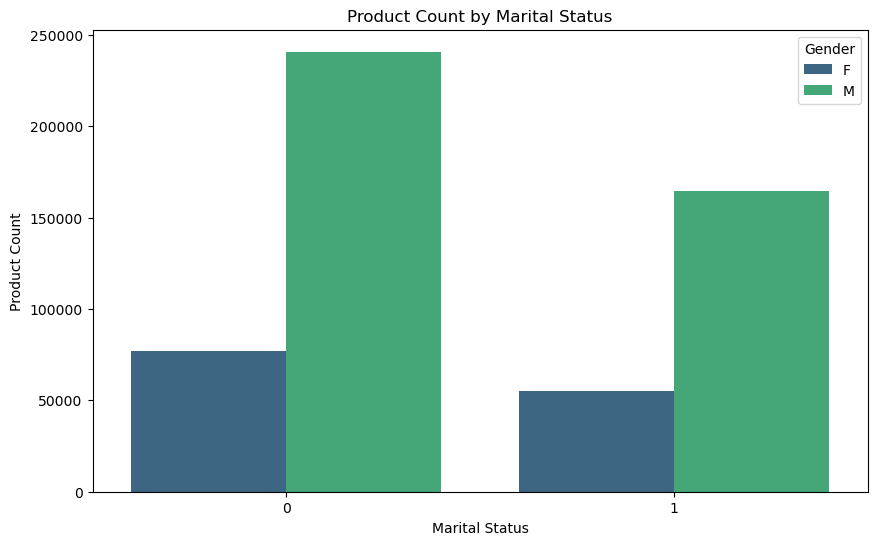

In [76]:
Products_by_status = sales.groupby(['Marital_Status','Product_ID', 'Gender']).size().reset_index(name = 'Product_count')

Products_by_status = Products_by_status.groupby(['Marital_Status','Gender'])['Product_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='Product_count', hue = 'Gender', data=Products_by_status, palette='viridis')
plt.title('Product Count by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Product Count')

plt.show()

### Total Products purchased by each age group in each marital status group

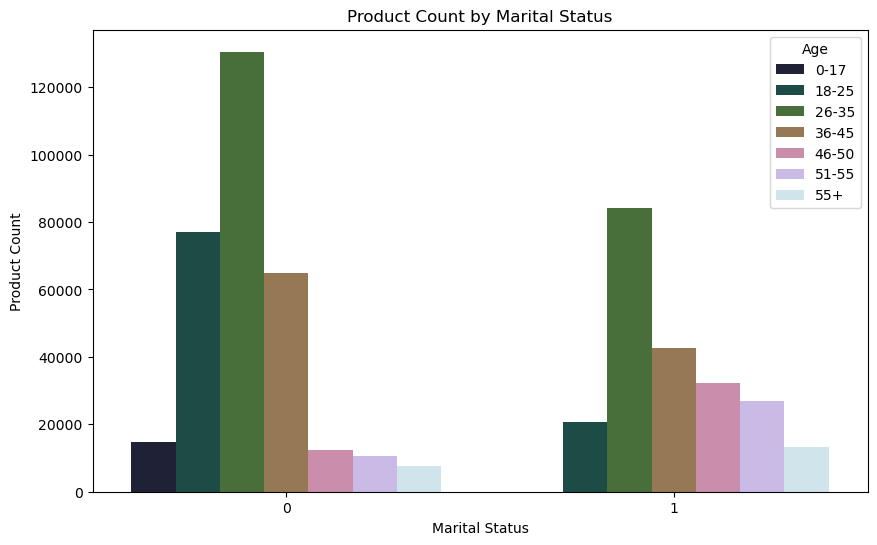

In [77]:
Products_by_status = sales.groupby(['Marital_Status','Product_ID', 'Age']).size().reset_index(name = 'Product_count')

Products_by_status = Products_by_status.groupby(['Marital_Status','Age'])['Product_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Marital_Status', y='Product_count', hue = 'Age', data=Products_by_status, palette='cubehelix')
plt.title('Product Count by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Product Count')

plt.show()

### Total Products purchased by each occupation in each marital status group

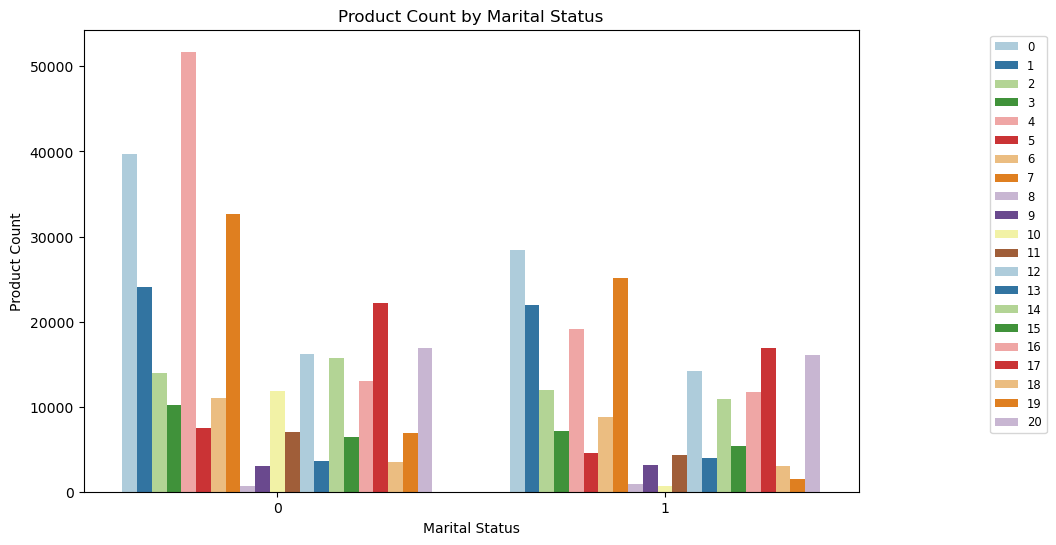

In [103]:
Products_by_status = sales.groupby(['Marital_Status','Product_ID', 'Occupation']).size().reset_index(name = 'Product_count')

Products_by_status = Products_by_status.groupby(['Marital_Status','Occupation'])['Product_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Marital_Status', y='Product_count', hue = 'Occupation', data=Products_by_status, palette='Paired')
ax.legend(fontsize ='small', bbox_to_anchor=(1.25, 1), ncol=1)
plt.title('Product Count by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Product Count')


plt.show()

In [105]:
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## 9. Product_Category_1

### Distribution of Product_Category_1

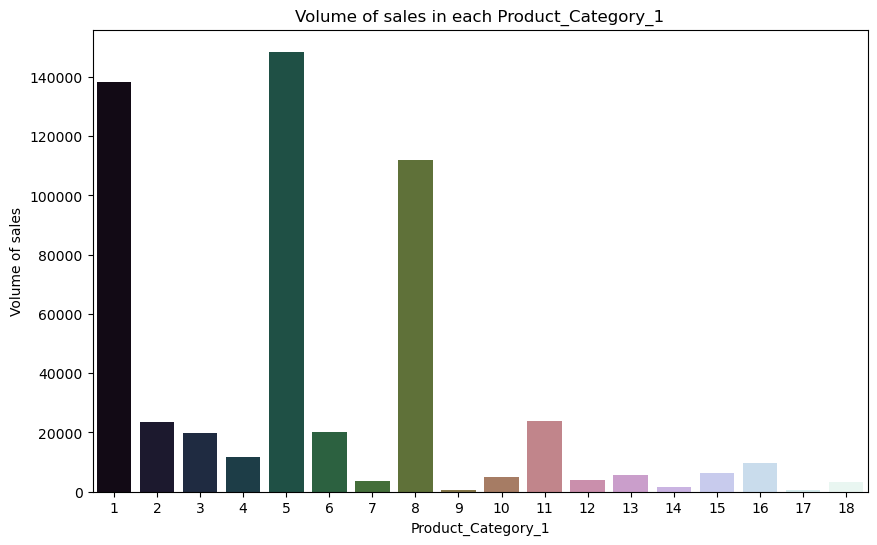

In [122]:
#group by user_id and count of Product_Category_1
Product_Categories = sales['Product_Category_1'].value_counts().reset_index()

#plot the data
plt.figure(figsize = (10, 6))
ax = sns.barplot(x='Product_Category_1', y='count', data= Product_Categories, palette='cubehelix')
#ax.legend(fontsize ='small', bbox_to_anchor=(1.25, 1), ncol=1)
plt.title('Volume of sales in each Product_Category_1')
plt.xlabel('Product_Category_1')
plt.ylabel('Volume of sales')


plt.show()

### Revenue generated in each Product_Category_1

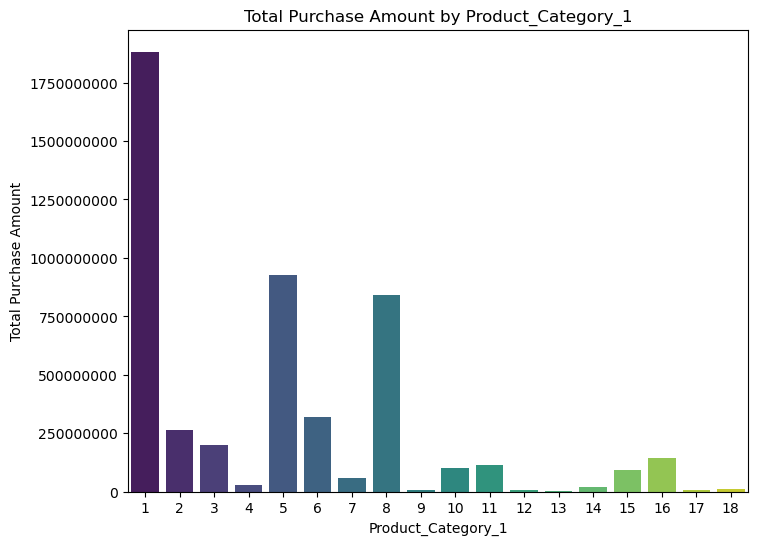

In [129]:
Customer_product = sales.groupby('Product_Category_1')['Purchase'].sum().reset_index()


#plot the data
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Product_Category_1', y='Purchase', data=Customer_product, palette="viridis")
plt.title('Total Purchase Amount by Product_Category_1')
plt.xlabel('Product_Category_1')
plt.ylabel('Total Purchase Amount')

#get the actual y labels
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Average Revenue generated by each Product_Category_1

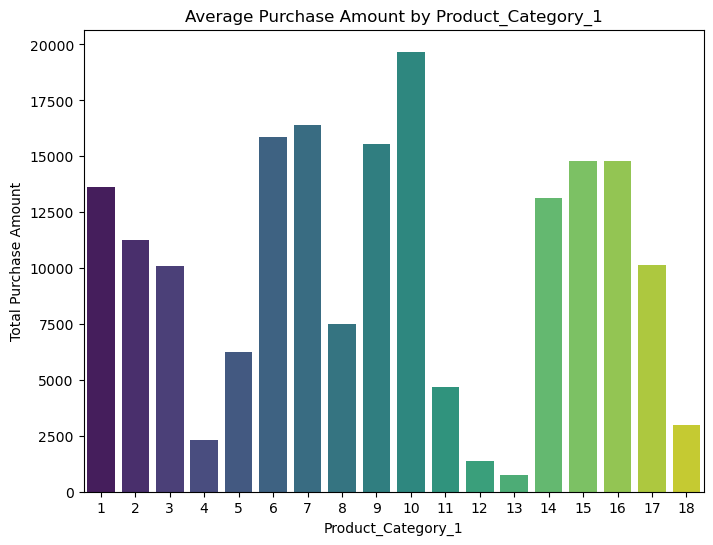

In [138]:
Customer_product = sales.groupby('Product_Category_1')['Purchase'].mean().reset_index()


#plot the data
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Product_Category_1', y='Purchase', data=Customer_product, palette="viridis")
plt.title('Average Purchase Amount by Product_Category_1')
plt.xlabel('Product_Category_1')
plt.ylabel('Total Purchase Amount')

#get the actual y labels
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Product_Categories Frequency by Gender

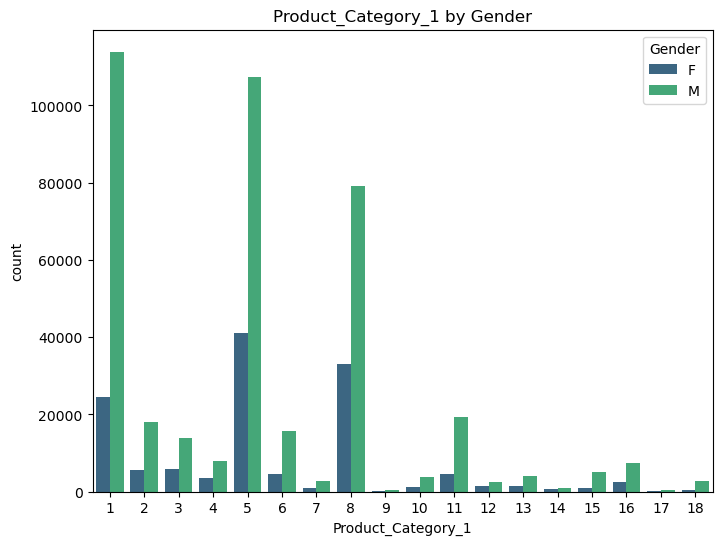

In [139]:
Customer_product = sales.groupby(['Product_Category_1', 'Gender']).size().reset_index(name = 'Product_Category_count')

#plot the data
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Product_Category_1', y='Product_Category_count', hue = 'Gender', data=Customer_product, palette="viridis")
plt.title('Product_Category_1 by Gender')
plt.xlabel('Product_Category_1')
plt.ylabel('count')

#get the actual y labels
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Product_Categories Frequency by Marital status

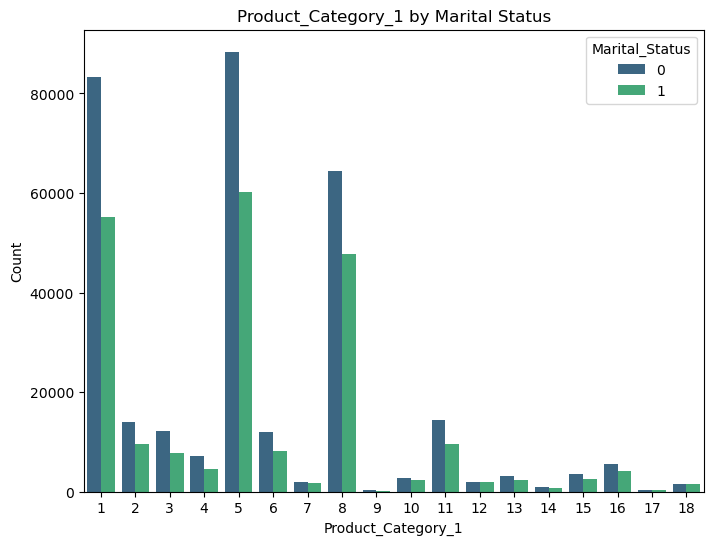

In [142]:
Customer_product = sales.groupby(['Product_Category_1', 'Marital_Status']).size().reset_index(name = 'Product_Category_count')

#plot the data
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Product_Category_1', y='Product_Category_count', hue = 'Marital_Status', data=Customer_product, palette="viridis")
plt.title('Product_Category_1 by Marital Status')
plt.xlabel('Product_Category_1')
plt.ylabel('Count')

#get the actual y labels
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

### Correlation matrix

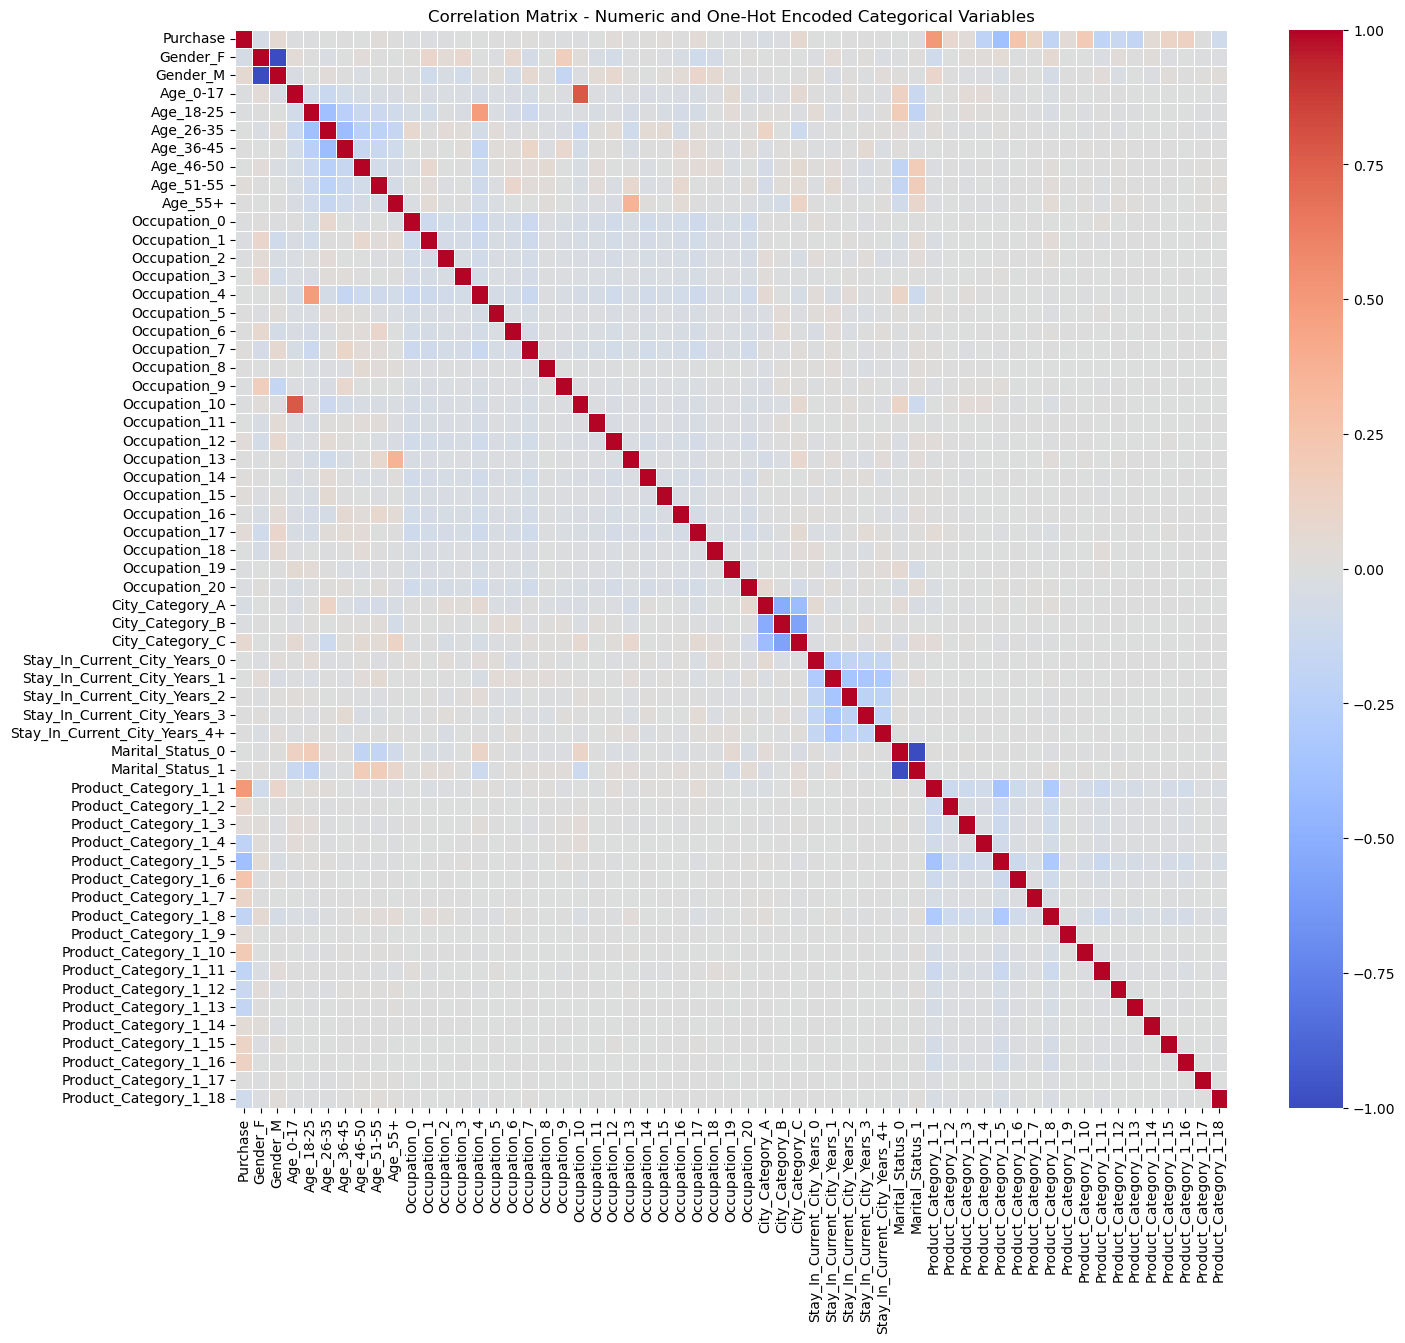

In [151]:
sales_data_analysis = sales.drop(['User_ID', 'Product_ID'], axis = 1)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(sales_data_analysis, columns=['Gender', 'Age', 'Occupation', 'City_Category', 
                                                          'Stay_In_Current_City_Years','Marital_Status', 
                                                          'Product_Category_1'])

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix - Numeric and One-Hot Encoded Categorical Variables")
plt.show()

In [159]:
df_encoded.columns

Index(['Purchase', 'Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20', 'City_Category_A', 'City_Category_B',
       'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Marital_Status_0', 'Marital_Status_1', 'Product_Category_1_1',
       'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7',
     